# Project Name   - Cardiovascular Health Assessment and Risk Prediction Model



#  Submitted By - Indrajith S.

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information.Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Sampling
from sklearn.utils import resample

# Import Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve , auc , classification_report

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset from github repository
data_cr = pd.read_csv('data_cardiovascular_risk.csv')

### Dataset First View

In [3]:
# Dataset First Look
# View top 5 rows of the dataset
data_cr.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [4]:
# View last 5 rows of the dataset
data_cr.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [5]:
# Dropping the id column
data_cr.drop(columns=['id'], inplace=True)

###### I am dropping this "ID" column as it is not relavant(no use for our model)

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data_cr.shape[0])
print("Number of columns are: ",data_cr.shape[1])

Number of rows are:  3390
Number of columns are:  16


### Dataset Information

In [7]:
# Dataset Info
# Checking information about the dataset using info
data_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


###### We can clearly observe that Sex and Is_smoking column is in object datatype, we need to convert into integer

In [8]:
# Replacing the string values of the binary column with 0 and 1
data_cr['sex'] = np.where(data_cr['sex'] == 'M',1,0)
data_cr['is_smoking'] = np.where(data_cr['is_smoking'] == 'YES',1,0)

###### Replaced the Male to 1 and female to 0, also is_smoking is 1 and not smoking means 0

#### Duplicate Values

In [9]:
# Checking Dataset Duplicate Value Count
data_cr.duplicated().sum()

0

##### There is no Duplicate values

TenYearCHD
0    2879
1     511
Name: count, dtype: int64
 


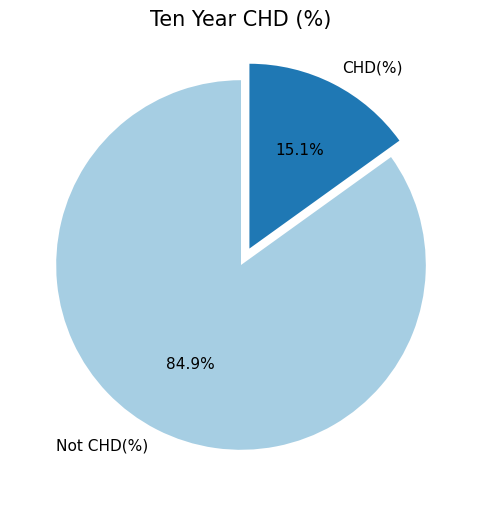

In [10]:
# Distribution of dependent varaible TenYearCHD

# Dependant Column Value Counts
print(data_cr.TenYearCHD.value_counts())
print(" ")

colors = sns.color_palette("Paired")

plt.figure(figsize=(10,6))
explode = [0,0.1]
textprops = {'fontsize':11}
plt.pie(data_cr['TenYearCHD'].value_counts(), labels=['Not CHD(%)','CHD(%)'], startangle=90, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('Ten Year CHD (%)', fontsize=15)
plt.show()

From the above chart we come to know that 15.1% that is 511 out of 3390 are classified as positive for 10 year CHD whereas the remaining 84.9% that is 2879 out of 3390 are classified as negative for 10 year CHD.

## Renaming the columns for better understanding

In [11]:
data_cr.rename(columns={'sex': 'Gender' ,'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp'},
               inplace = True)

In [12]:
cat_var = ['Gender', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [13]:
con_var = ['age' , 'cigsPerDay', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'BMI', 'heartRate', 'glucose']

###### Splitted the columns into categorical variables and continuous variables for further analysis.

#### Missing Values/Null Values

In [14]:
# Checking missing values/null values count for each column
data_cr.isnull().sum()

age                    0
education             87
Gender                 0
is_smoking             0
cigsPerDay            22
BPMeds                44
prevalentStroke        0
prevalentHyp           0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
BMI                   14
heartRate              1
glucose              304
TenYearCHD             0
dtype: int64

###### Totally 7 columns has some missing values, total count of missing values are 510
     As our dataset count is less, it is better to impute instead of dropping, We will use appropriate method that 
    suits for the column

# Handling Missing Values

In [15]:
# Replacing the missing values in the categorical columns with its mode
data_cr['education'] = data_cr['education'].fillna(data_cr['education'].mode()[0])
data_cr['BPMeds'] = data_cr['BPMeds'].fillna(data_cr['BPMeds'].mode()[0])

In [16]:
# Mean and median number of cigarettes per day
data_cr.cigsPerDay.mean().round(0),data_cr.cigsPerDay.median()

(9.0, 0.0)

In [17]:
# All missing values in the cigs_per_day column
data_cr[data_cr['cigsPerDay'].isna()]

age  education  Gender  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
422    55        1.0       0           1         NaN     0.0                0   
466    45        3.0       1           1         NaN     0.0                0   
469    42        1.0       1           1         NaN     0.0                0   
491    61        1.0       0           1         NaN     0.0                0   
538    41        1.0       0           1         NaN     0.0                0   
767    54        1.0       1           1         NaN     0.0                0   
1461   47        2.0       0           1         NaN     0.0                0   
1467   49        1.0       0           1         NaN     0.0                0   
1597   57        1.0       0           1         NaN     0.0                0   
1986   49        2.0       0           1         NaN     0.0                0   
2031   58        4.0       0           1         NaN     0.0                0   
2087   49        4.0       1           1         NaN     0.0                0   
2240   47        3.0       0           1         NaN     0.0                0   
2284   45        2.0       1           1         NaN     0.0                0   
2527   58        2.0       1           1         NaN     0.0                0   
2638   57        1.0       1           1         NaN     0.0                0   
2648   39        2.0       1           1         NaN     0.0                0   
2723   43        4.0       1           1         NaN     0.0                0   
2879   42        1.0       1           1         NaN     0.0                0   
2945   53        2.0       1           1         NaN     0.0                0   
3301   55        1.0       1           1         NaN     0.0                0   
3378   39        3.0       0           1         NaN     0.0                0   

      prevalentHyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
422              1         0              213.0        163.0          91.0   
466              1         0              170.0        145.5          99.0   
469              0         0              196.0        123.0          73.0   
491              1         0              356.0        168.0          98.0   
538              0         0              171.0        135.0          82.5   
767              0         0              219.0        110.0          72.0   
1461             0         0              365.0        127.0          76.0   
1467             0         0              252.0        123.0          69.0   
1597             0         0              229.0        115.0          69.0   
1986             1         0              233.0        158.0         102.0   
2031             1         0              270.0        195.0         117.5   
2087             0         0              256.0        127.5          81.5   
2240             0         0              321.0        132.0          88.0   
2284             0         0              248.0        121.0          72.0   
2527             0         0              235.0        127.5          76.0   
2638             0         0              223.0        107.5          72.5   
2648             0         0              285.0        121.0          82.0   
2723             0         0              222.0        109.5          69.0   
2879             0         0              226.0        119.0          80.0   
2945             0         0              276.0        130.0          86.0   
3301             0         0              214.0        132.5          85.5   
3378             0         0              197.0        126.5          76.5   

        BMI  heartRate  glucose  TenYearCHD  
422   28.66       69.0     66.0           0  
466   26.74       83.0     85.0           0  
469   22.06       66.0      NaN           0  
491   27.30      103.0    106.0           0  
538   24.35       79.0     82.0           0  
767   26.05       95.0     86.0           0  
1461  24.44       72.0   

###### It is observed that the missing value of the cigs per day for all entry has the 'is smoking' column as 1 that is they smoke.

In [18]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
data_cr[data_cr['is_smoking']== 1]['cigsPerDay'].mean()
data_cr[data_cr['is_smoking']== 1]['cigsPerDay'].median()

20.0

In [19]:
# Imputing the missing values in the cigs_per_day
data_cr['cigsPerDay'] = data_cr['cigsPerDay'].fillna(data_cr[data_cr['is_smoking']== 1]['cigsPerDay'].median())

In [20]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

data_cr[(data_cr['is_smoking']== 0) & (data_cr['cigsPerDay']>0)]

Empty DataFrame
Columns: [age, education, Gender, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, BMI, heartRate, glucose, TenYearCHD]
Index: []

#### there is no wrong entry in this column

In [21]:
# Mean and median for total_cholesterol before imputing
print("The mean for total_cholesterol before imputing:", data_cr['total_cholesterol'].mean())
print("The median for total_cholesterol before imputing:", data_cr['total_cholesterol'].median())

The mean for total_cholesterol before imputing: 237.07428400954655
The median for total_cholesterol before imputing: 234.0


In [22]:
# imputing with median
data_cr['total_cholesterol'] = data_cr['total_cholesterol'].fillna(data_cr['total_cholesterol'].median())
print("The mean for total_cholesterol after imputing:", data_cr['total_cholesterol'].mean())
print("The median for total_cholesterol after imputing:", data_cr['total_cholesterol'].median())

The mean for total_cholesterol after imputing: 237.03982300884957
The median for total_cholesterol after imputing: 234.0


In [23]:
# Mean and median for BMI
print("The mean for BMI before imputing:", data_cr.BMI.mean())
print("The median for BMI before imputing:",data_cr.BMI.median())

The mean for BMI before imputing: 25.7949644549763
The median for BMI before imputing: 25.38


In [24]:
data_cr['BMI'] = data_cr['BMI'].fillna(data_cr['BMI'].median())

In [25]:
# Mean and median for after BMI 
print("The mean for BMI after imputing:", data_cr.BMI.mean())
print("The median for BMI after imputing:",data_cr.BMI.median())

The mean for BMI after imputing: 25.793250737463126
The median for BMI after imputing: 25.38


In [26]:
# Imputing heart_rate with median 
data_cr['heartRate'] = data_cr['heartRate'].fillna(data_cr['heartRate'].median())

In [27]:
# We can observe high number of missing values in glucose so imputing with mode method
print((data_cr["glucose"].mode())[0])

75.0


In [28]:
data_cr["glucose"].fillna((data_cr["glucose"].mode())[0], inplace=True)

In [29]:
data_cr.isnull().sum()

age                  0
education            0
Gender               0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

## After imputing treatment, we can clearly observe there is no null values present in our dataset

##  Understanding the Variables

In [30]:
# Dataset Columns
data_cr.columns

Index(['age', 'education', 'Gender', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [31]:
# Dataset Describe (all columns included)
data_cr.describe(include= 'all').round(2)

age  education   Gender  is_smoking  cigsPerDay   BPMeds  \
count  3390.00    3390.00  3390.00      3390.0     3390.00  3390.00   
mean     49.54       1.95     0.43         0.5        9.14     0.03   
std       8.59       1.02     0.50         0.5       11.87     0.17   
min      32.00       1.00     0.00         0.0        0.00     0.00   
25%      42.00       1.00     0.00         0.0        0.00     0.00   
50%      49.00       2.00     0.00         0.0        0.00     0.00   
75%      56.00       3.00     1.00         1.0       20.00     0.00   
max      70.00       4.00     1.00         1.0       70.00     1.00   

       prevalentStroke  prevalentHyp  diabetes  total_cholesterol  \
count          3390.00       3390.00   3390.00            3390.00   
mean              0.01          0.32      0.03             237.04   
std               0.08          0.46      0.16              44.99   
min               0.00          0.00      0.00             107.00   
25%               0.00          0.00      0.00             206.00   
50%               0.00          0.00      0.00             234.00   
75%               0.00          1.00      0.00             264.00   
max               1.00          1.00      1.00             696.00   

       systolic_bp  diastolic_bp      BMI  heartRate  glucose  TenYearCHD  
count      3390.00       3390.00  3390.00    3390.00  3390.00     3390.00  
mean        132.60         82.88    25.79      75.98    81.45        0.15  
std          22.29         12.02     4.11      11.97    23.22        0.36  
min          83.50         48.00    15.96      45.00    40.00        0.00  
25%         117.00         74.50    23.03      68.00    72.00        0.00  
50%         128.50         82.00    25.38      75.00    77.00        0.00  
75%         144.00         90.00    28.00      83.00    85.00        0.00  
max         295.00        142.50    56.80     143.00   394.00        1.00

### Variables Description

**Demographic:**
* Sex: male or female ("M" or "F")
* Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history):**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current):**
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Predict variable (desired target):**
* TenYearCHD: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [32]:
# Check Unique Values for each variable using a for loop
for i in data_cr.columns.tolist():
  print("No. of unique values in",i,"is",data_cr[i].nunique())

No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in Gender is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in total_cholesterol is 240
No. of unique values in systolic_bp is 226
No. of unique values in diastolic_bp is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


In [33]:
df_BPMed = data_cr.groupby(['prevalentStroke','prevalentHyp'])
df_BPMed['BPMeds'].sum()

prevalentStroke  prevalentHyp
0                0                0.0
                 1               94.0
1                0                0.0
                 1                6.0
Name: BPMeds, dtype: float64

### It seems a prevalent Hyper tension patient are very likely to be on BPMed.

In [34]:
data_cr

age  education  Gender  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0      64        2.0       0           1         3.0     0.0                0   
1      36        4.0       1           0         0.0     0.0                0   
2      46        1.0       0           1        10.0     0.0                0   
3      50        1.0       1           1        20.0     0.0                0   
4      64        1.0       0           1        30.0     0.0                0   
...   ...        ...     ...         ...         ...     ...              ...   
3385   60        1.0       0           0         0.0     0.0                0   
3386   46        1.0       0           0         0.0     0.0                0   
3387   44        3.0       1           1         3.0     0.0                0   
3388   60        1.0       1           0         0.0     0.0                0   
3389   54        3.0       0           0         0.0     0.0                0   

      prevalentHyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0                0         0              221.0        148.0          85.0   
1                1         0              212.0        168.0          98.0   
2                0         0              250.0        116.0          71.0   
3                1         0              233.0        158.0          88.0   
4                0         0              241.0        136.5          85.0   
...            ...       ...                ...          ...           ...   
3385             0         0              261.0        123.5          79.0   
3386             0         0              199.0        102.0          56.0   
3387             1         0              352.0        164.0         119.0   
3388             1         0              191.0        167.0         105.0   
3389             0         0              288.0        124.0          77.0   

        BMI  heartRate  glucose  TenYearCHD  
0     25.38       90.0     80.0           1  
1     29.77       72.0     75.0           0  
2     20.35       88.0     94.0           0  
3     28.26       68.0     94.0           1  
4     26.42       70.0     77.0           0  
...     ...        ...      ...         ...  
3385  29.28       70.0    103.0           0  
3386  21.96       80.0     84.0           0  
3387  28.92       73.0     72.0           1  
3388  23.01       80.0     85.0           0  
3389  29.88       79.0     92.0           0  

[3390 rows x 16 columns]

##  EDA

In [35]:
for feature in cat_var:
    print(feature,':')
    print(data_cr[feature].value_counts())
    print("-----------------")

Gender :
Gender
0    1923
1    1467
Name: count, dtype: int64
-----------------
education :
education
1.0    1478
2.0     990
3.0     549
4.0     373
Name: count, dtype: int64
-----------------
is_smoking :
is_smoking
0    1703
1    1687
Name: count, dtype: int64
-----------------
BPMeds :
BPMeds
0.0    3290
1.0     100
Name: count, dtype: int64
-----------------
prevalentStroke :
prevalentStroke
0    3368
1      22
Name: count, dtype: int64
-----------------
prevalentHyp :
prevalentHyp
0    2321
1    1069
Name: count, dtype: int64
-----------------
diabetes :
diabetes
0    3303
1      87
Name: count, dtype: int64
-----------------


In [36]:
prevalentStroke = data_cr[data_cr['prevalentStroke'] == 1]

# Display the value counts of 'TenYearCHD' for rows where 'diabetes' is equal to 1
print(prevalentStroke['TenYearCHD'].value_counts())

TenYearCHD
0    12
1    10
Name: count, dtype: int64


In [37]:
data_cr['BPMeds'].value_counts()

BPMeds
0.0    3290
1.0     100
Name: count, dtype: int64

In [38]:
BPMeds = data_cr[data_cr['BPMeds'] == 1]

# Display the value counts of 'TenYearCHD' for rows where 'diabetes' is equal to 1
print(BPMeds['TenYearCHD'].value_counts())

TenYearCHD
0    67
1    33
Name: count, dtype: int64


In [39]:
# Filter data_cr for rows where bpmeds == 1
filtered_data = data_cr[data_cr['BPMeds'] == 1]

filtered_data

age  education  Gender  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
38     41        2.0       0           1         9.0     1.0                1   
104    57        1.0       0           0         0.0     1.0                0   
163    67        1.0       0           0         0.0     1.0                0   
190    46        1.0       0           1         7.0     1.0                0   
204    59        4.0       0           0         0.0     1.0                0   
...   ...        ...     ...         ...         ...     ...              ...   
3180   65        1.0       0           0         0.0     1.0                0   
3241   43        2.0       1           0         0.0     1.0                0   
3250   60        2.0       0           1        20.0     1.0                0   
3278   49        2.0       0           1        30.0     1.0                0   
3371   55        2.0       0           0         0.0     1.0                0   

      prevalentHyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
38               1         0              180.0        114.0          70.0   
104              1         0              190.0        155.0          85.0   
163              1         0              251.0        192.0         102.0   
190              1         0              280.0        202.0         124.0   
204              1         0              282.0        135.0          87.0   
...            ...       ...                ...          ...           ...   
3180             1         0              230.0        159.0          87.0   
3241             1         0              234.0        173.0          96.0   
3250             1         0              294.0        220.0         118.0   
3278             1         0              350.0        174.0          90.0   
3371             1         0              285.0        158.0          98.0   

        BMI  heartRate  glucose  TenYearCHD  
38    22.41       92.0     75.0           0  
104   26.08       55.0     66.0           0  
163   44.09       55.0     62.0           0  
190   28.06       66.0     63.0           1  
204   28.96       72.0     75.0           0  
...     ...        ...      ...         ...  
3180  22.91       70.0     65.0           1  
3241  27.99      100.0     76.0           0  
3250  24.22       90.0     59.0           0  
3278  18.44      110.0     78.0           0  
3371  30.23       70.0     88.0           0  

[100 rows x 16 columns]

In [40]:
# Filter data_cr for rows where bpmeds == 1
filtered_data = data_cr[data_cr['prevalentStroke'] == 1]

filtered_data

age  education  Gender  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
29     63        1.0       0           0         0.0     0.0                1   
38     41        2.0       0           1         9.0     1.0                1   
54     63        1.0       1           1        20.0     0.0                1   
86     52        2.0       1           0         0.0     0.0                1   
173    58        1.0       0           0         0.0     0.0                1   
584    52        2.0       0           1         5.0     0.0                1   
610    42        2.0       0           0         0.0     0.0                1   
680    60        3.0       1           0         0.0     0.0                1   
795    65        1.0       1           0         0.0     0.0                1   
958    54        2.0       0           0         0.0     0.0                1   
1019   61        1.0       0           0         0.0     1.0                1   
1188   52        1.0       0           0         0.0     0.0                1   
1225   58        3.0       1           0         0.0     1.0                1   
1440   47        1.0       0           0         0.0     0.0                1   
1778   58        1.0       0           0         0.0     1.0                1   
1862   65        1.0       0           0         0.0     0.0                1   
1868   60        1.0       0           1        15.0     0.0                1   
2029   56        1.0       1           0         0.0     1.0                1   
2176   53        3.0       1           1        15.0     0.0                1   
2231   70        1.0       0           0         0.0     0.0                1   
2747   60        1.0       0           0         0.0     1.0                1   
3354   38        2.0       1           0         0.0     0.0                1   

      prevalentHyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
29               1         0              273.0        152.0          70.0   
38               1         0              180.0        114.0          70.0   
54               1         0              213.0        163.0          94.0   
86               0         0              202.0        136.0          94.0   
173              1         1              267.0        157.0          94.0   
584              1         0              205.0        159.0         110.0   
610              0         0              206.0        101.0          75.0   
680              1         0              203.0        140.0          95.0   
795              1         0              266.0        140.0         100.0   
958              0         0              321.0        150.0          93.0   
1019             1         0              225.0        194.0         111.0   
1188             1         0              291.0        150.0          94.0   
1225             1         0              241.0        164.0          97.0   
1440             0         0              220.0        124.0          75.5   
1778             1         0              274.0        159.0          90.0   
1862             1         0              290.0        144.0          64.0   
1868             1         0              254.0        177.0         101.0   
2029             1         0              208.0        167.0          92.0   
2176             0         0              161.0        116.0          74.5   
2231             1         0              107.0        143.0          93.0   
2747             1         0              252.0        189.0         110.0   
3354             0         0              224.0        127.5          81.0   

        BMI  heartRate  glucose  TenYearCHD  
29    19.69       80.0     79.0           1  
38    22.41       92.0     75.0           0  
54    25.38       76.0     69.0           1  
86    29.93       83.0     67.0           1  
173   33.32       92.0    205.0           1  
584   28.18       75.0     83.0           1  
610   18.73       55.0   

In [41]:
prevalentHyp = data_cr[data_cr['prevalentHyp'] == 1]

# Display the value counts of 'TenYearCHD' for rows where 'diabetes' is equal to 1
print(prevalentHyp['TenYearCHD'].value_counts())

TenYearCHD
0    814
1    255
Name: count, dtype: int64


In [42]:
diabetes_positive = data_cr[data_cr['diabetes'] == 1]

# Display the value counts of 'TenYearCHD' for rows where 'diabetes' is equal to 1
print(diabetes_positive['TenYearCHD'].value_counts())

TenYearCHD
0    54
1    33
Name: count, dtype: int64


In [43]:
is_smoking = data_cr[data_cr['is_smoking'] == 'YES']

# Display the value counts of 'TenYearCHD' for rows where 'diabetes' is equal to 1
print(is_smoking['TenYearCHD'].value_counts())

Series([], Name: count, dtype: int64)


## Data Vizualization : Understand the relationships between variables

#### Ten Year CHD For Different Age Group

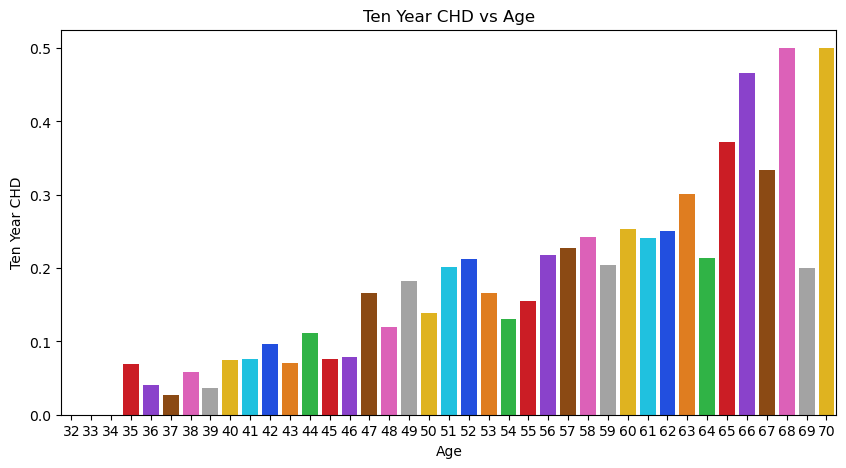

In [44]:
#Group by Age and get average
avg_CHD = data_cr.groupby('age')['TenYearCHD'].mean().reset_index()

# Plot average CHD over different age
plt.figure(figsize=(10,5))
ax = sns.barplot(x= avg_CHD['age'], y= avg_CHD['TenYearCHD'], palette="bright")
ax.set_ylabel("Ten Year CHD")
ax.set_xlabel("Age")
ax.set_title('Ten Year CHD vs Age')
plt.show()

From above bar plot we can clearly see that the average CHD is high for above 65+ aged peoples. But a sudden drop in 67 and 69 year old group (CHD value is low there). And also for below 65 year, the CHD is much less

In [45]:
import plotly.graph_objs as go

trace = go.Scatter3d(
    x=avg_CHD['age'],
    y=avg_CHD['TenYearCHD'], 
    z=[0] * len(avg_CHD), 
    text=['Age: {}<br>Ten Year CHD: {}'.format(age, chd) for age, chd in zip(avg_CHD['age'], avg_CHD['TenYearCHD'])],  # Text to display on hover
    hoverinfo='text',  
    marker=dict(
        size=8,  
        color='skyblue',  
    )
)

layout = go.Layout(
    title='Average Ten Year CHD vs Age',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Ten Year CHD'),
        zaxis=dict(title=''),
    )
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [46]:
# Plotting a Interactive bar plot
data = go.Bar(
    x=avg_CHD['age'],  
    y=avg_CHD['TenYearCHD'],  
    hoverinfo='x+y',  
    marker=dict(color='skyblue')
)

layout = go.Layout(
    title='Average Ten Year CHD vs Age',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Ten Year CHD'),
        zaxis=dict(title='Frequency'),
    )
)

fig = go.Figure(data=[data], layout=layout)
fig.show()


## Categorical variable Distribution

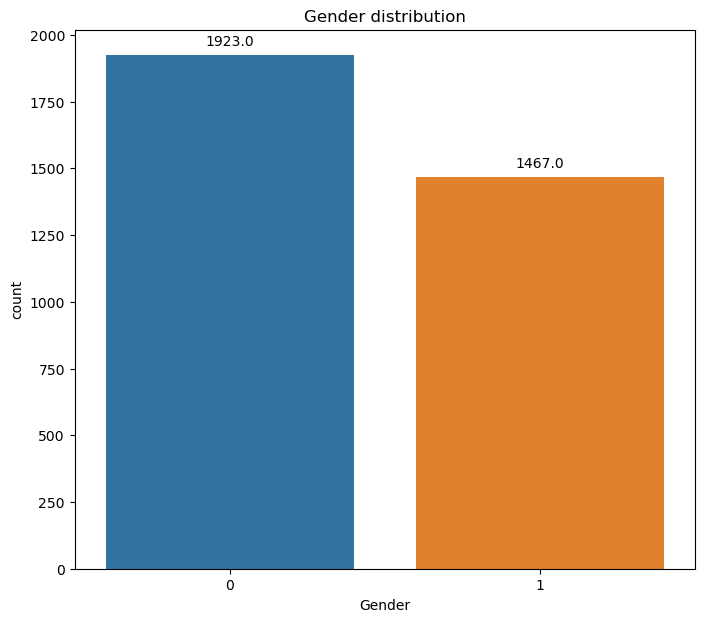

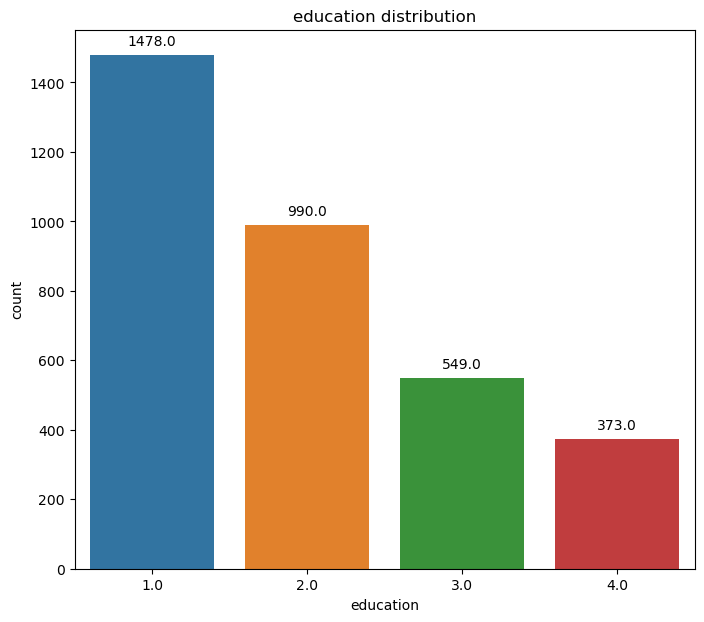

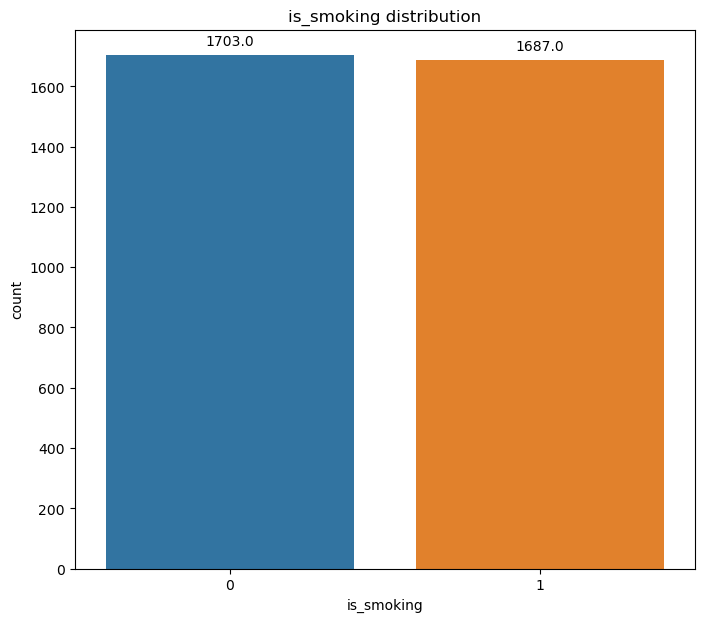

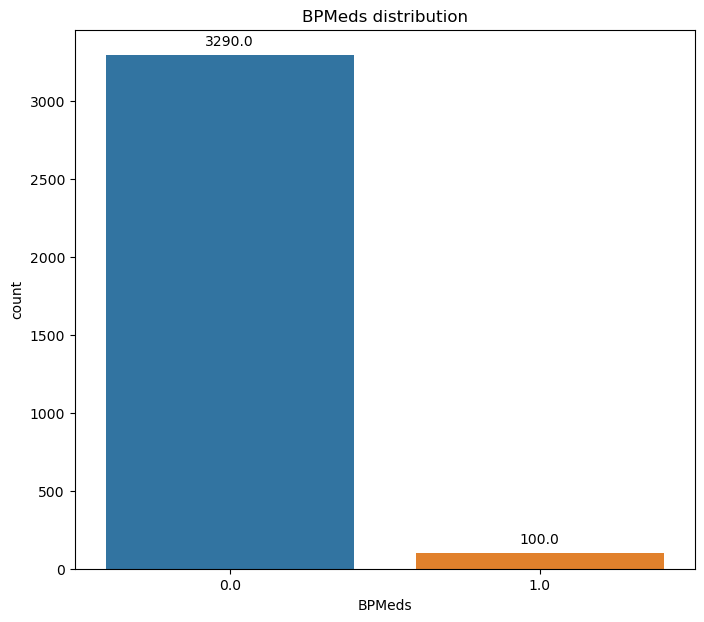

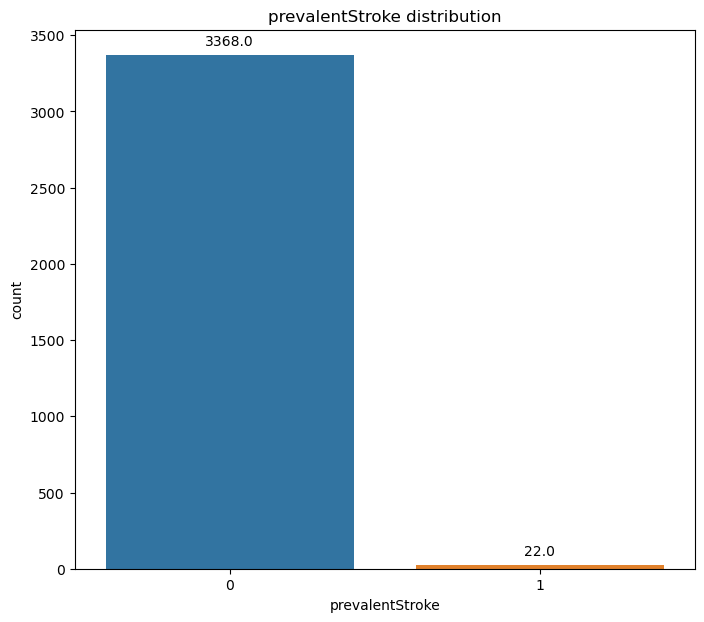

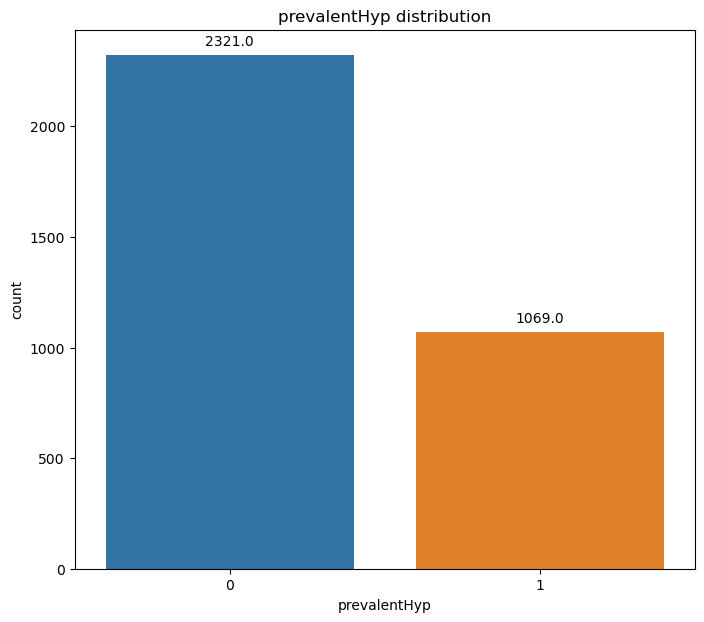

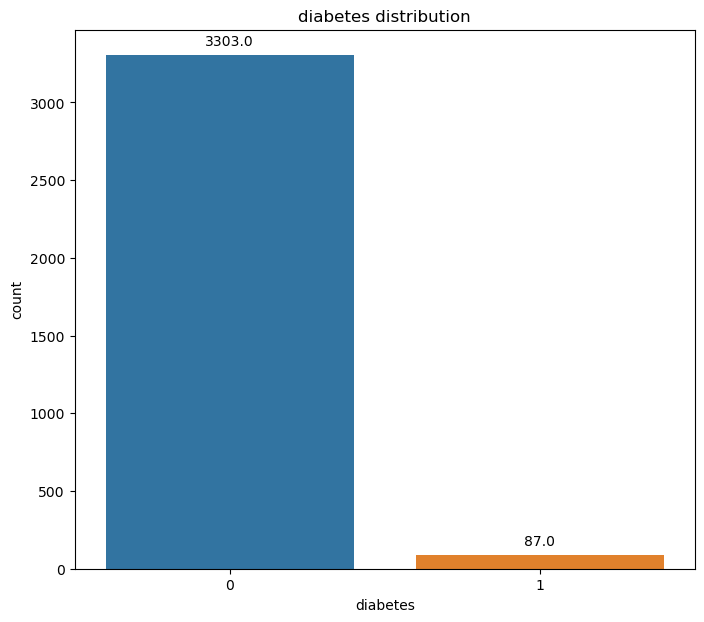

In [47]:
# Analysing the distribution of categorical variables in the dataset
for i in cat_var:
    plt.figure(figsize=(8,7))
    p = sns.countplot(x=i, data = data_cr)
    plt.xlabel(i)
    plt.title(i+' distribution')
    for i in p.patches:
        p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.show()

The distribution of different categories in the categorical columns can be seen. The education column has the highest for the 1 category followed by 2 3 and 4.

The gender distribution is not even with high count for females.
The 'is_smoking' column is even. Bp_meds, prevalent_stroke, prevalent_hyp and diabetes are imbalanced, they have very few counts for the positive cases.

####  Dependent variable with continuous variables (Bivariate)

<Figure size 800x500 with 0 Axes>

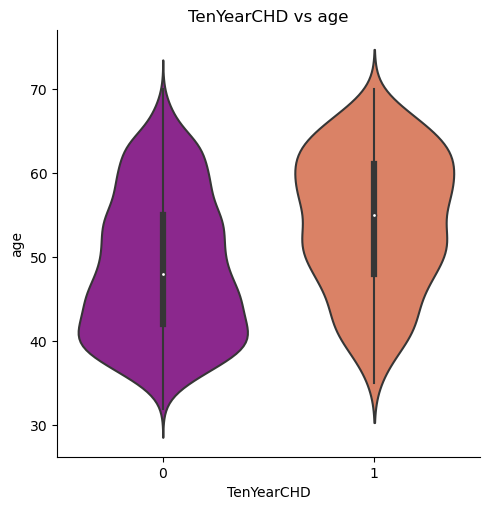

<Figure size 800x500 with 0 Axes>

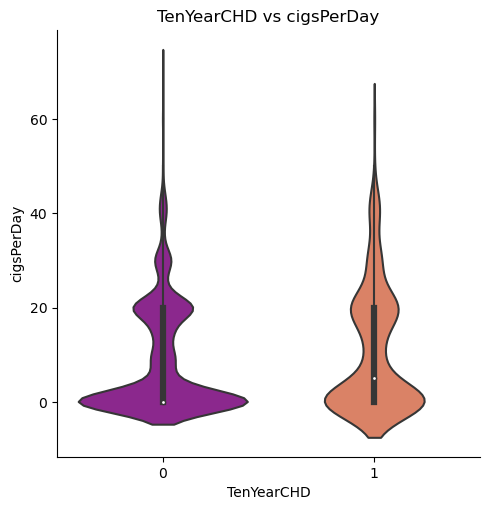

<Figure size 800x500 with 0 Axes>

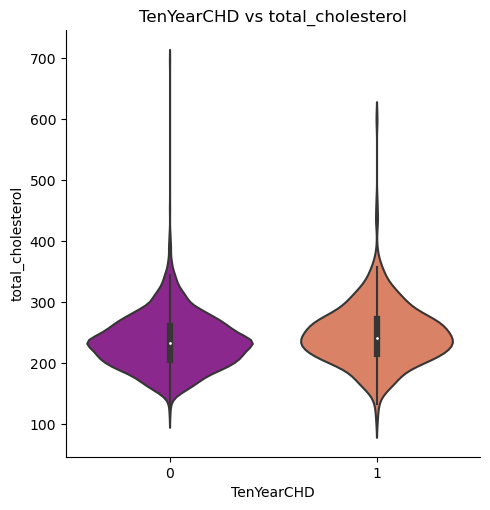

<Figure size 800x500 with 0 Axes>

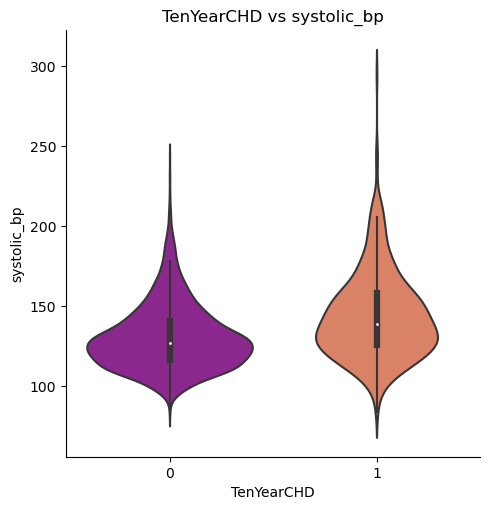

<Figure size 800x500 with 0 Axes>

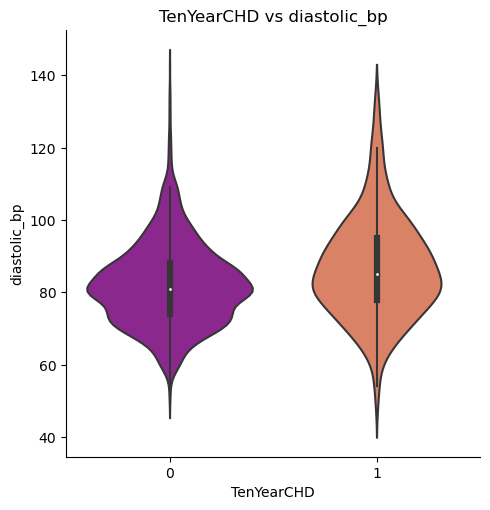

<Figure size 800x500 with 0 Axes>

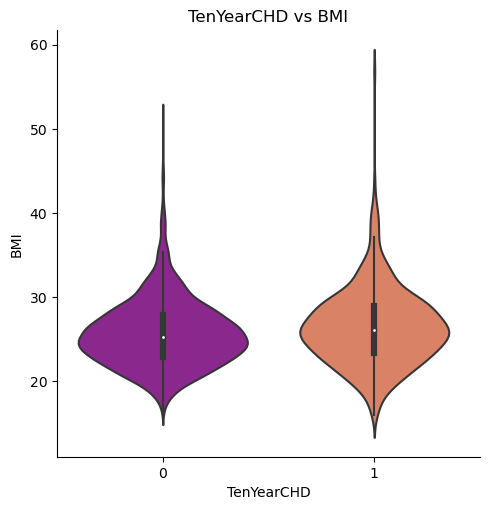

<Figure size 800x500 with 0 Axes>

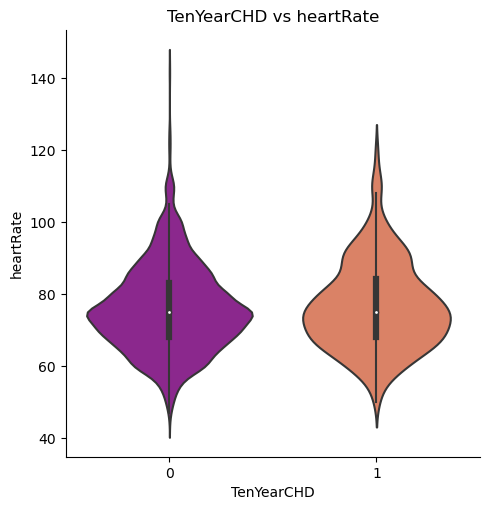

<Figure size 800x500 with 0 Axes>

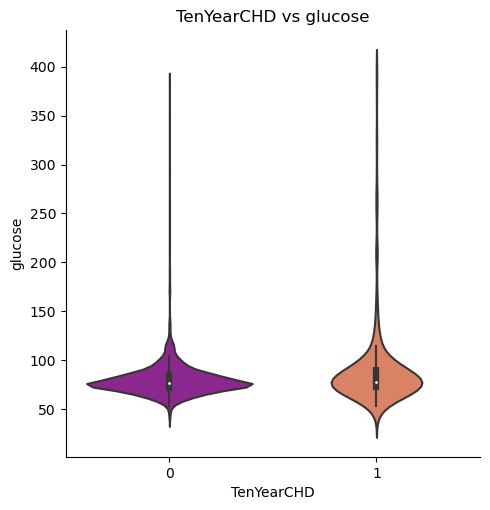

In [48]:
# Relationship between the dependent variable and continuous independent variables
for i in con_var:
    plt.figure(figsize=(8,5))
    sns.catplot(x='TenYearCHD',y=i,data=data_cr,kind='violin', palette="plasma")
    plt.ylabel(i)
    plt.xlabel('TenYearCHD')
    plt.title('TenYearCHD'+' vs '+i)
    plt.show()

For age vs TenYearCHD, we see that the density for positive cases is high at higher age as compared to lower age indicating that the positive cases are higher in older people.

For cigsper_day, the negative cases are more for the non smokers compared to the positive cases for non smokers.

For TenYearCHD and glucose, the negative cases have high density compared to the positive cases for the same value of glucose.

The remaining charts do not provide much information.

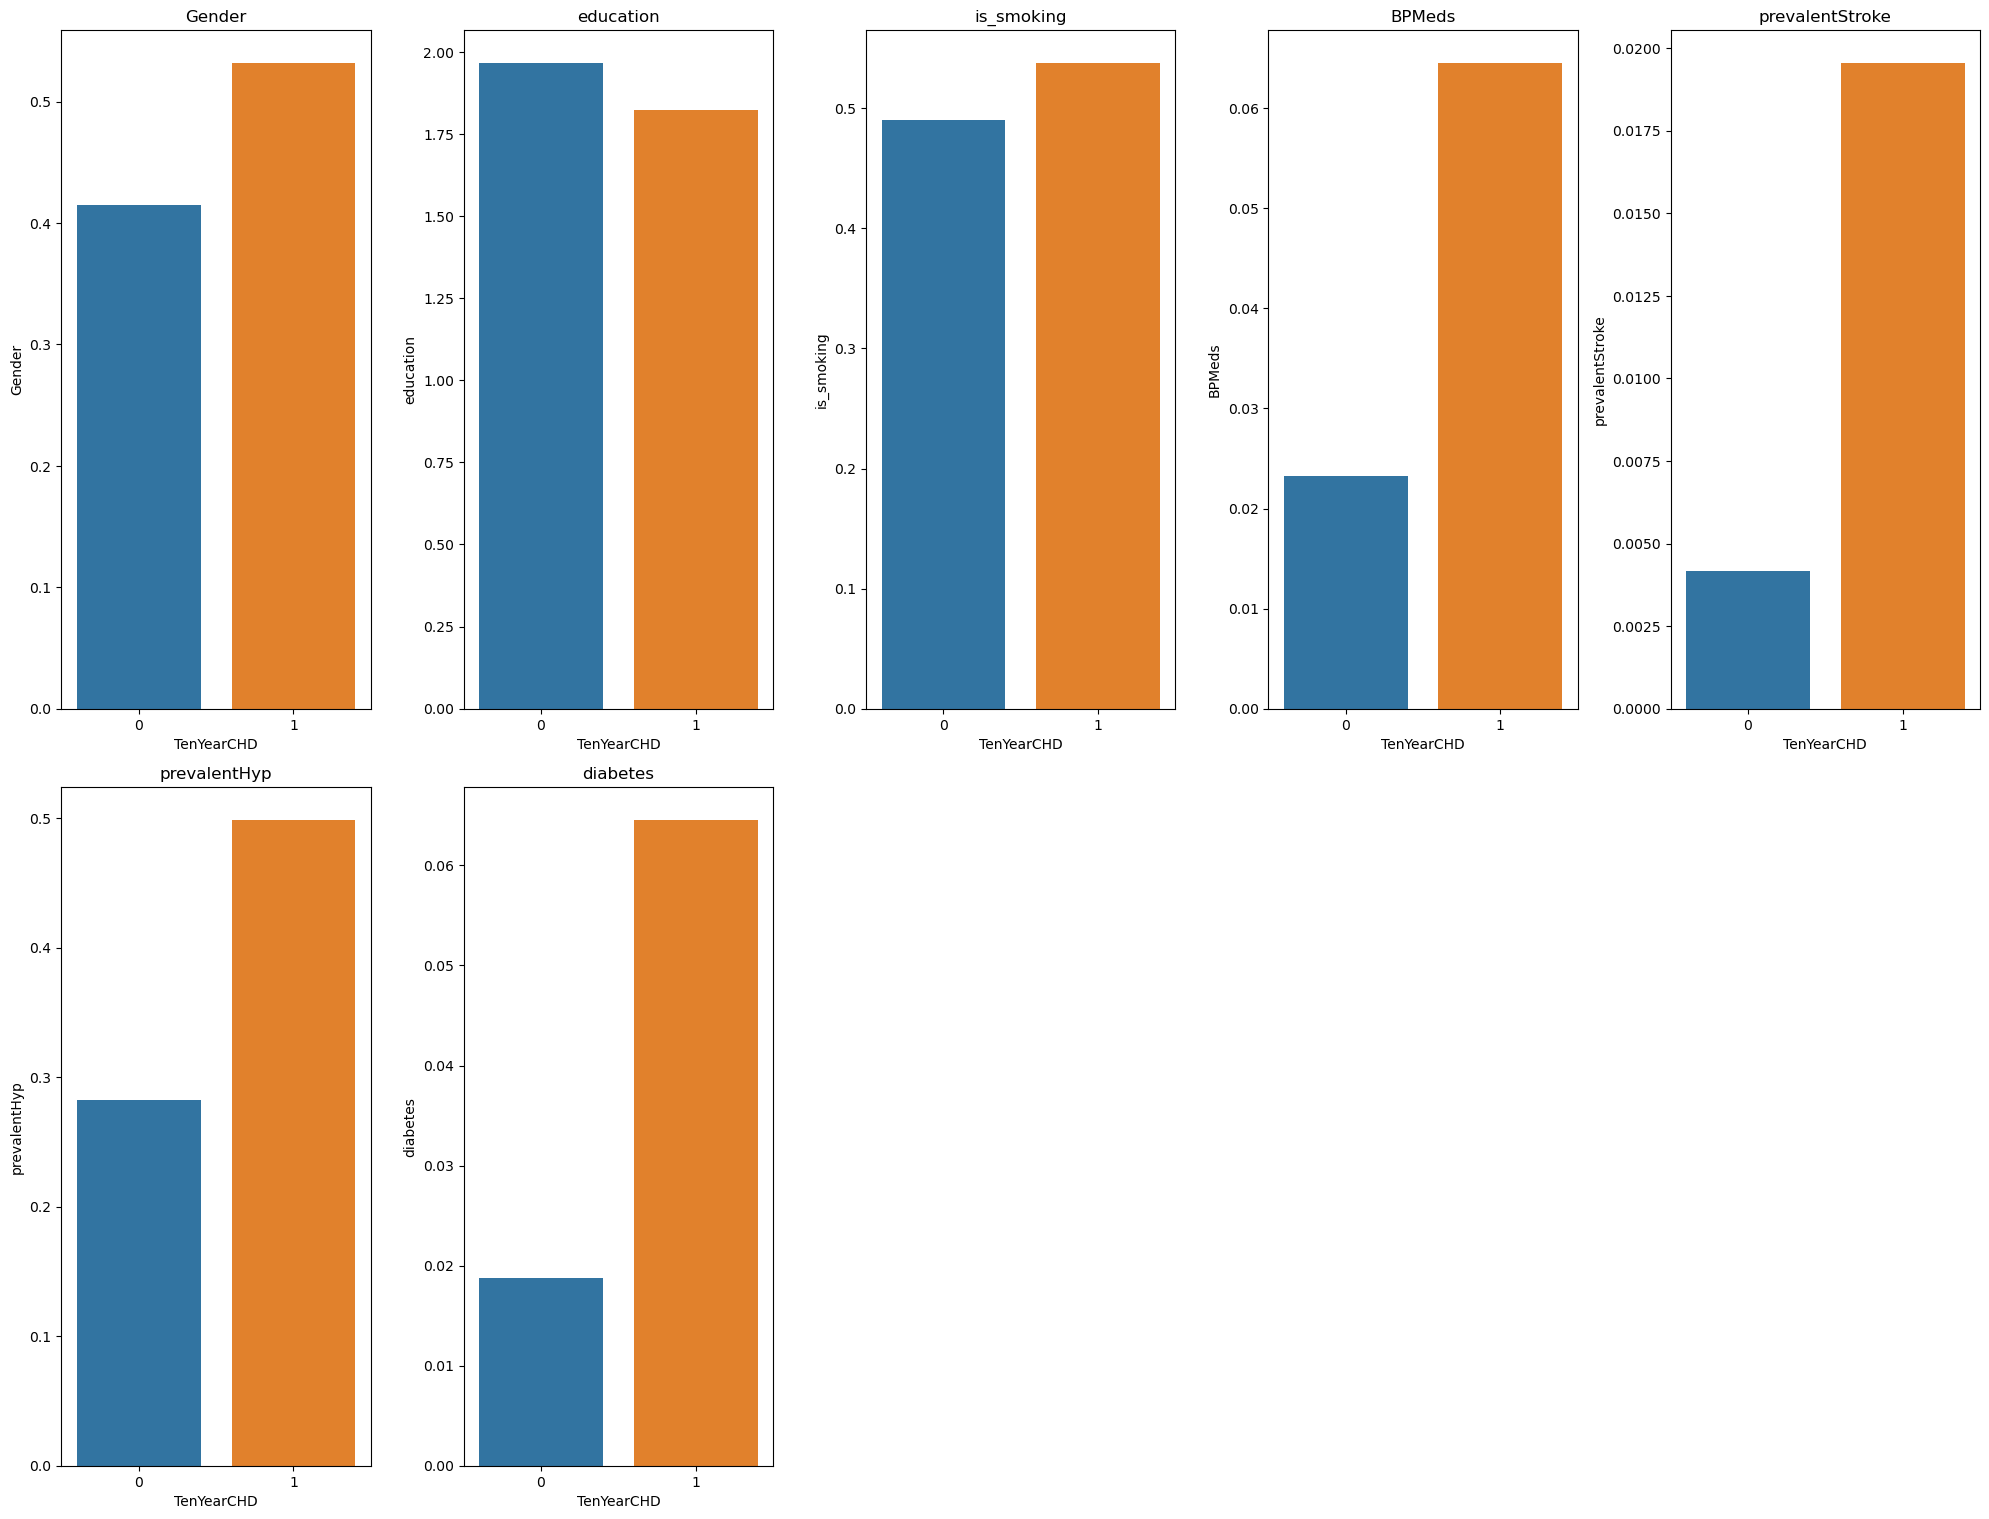

In [49]:
plt.figure(figsize=(20, 30))
# Loop through all the selected features to plot
for index, col in enumerate(cat_var, start=1):
        plt.subplot(4, 5, index)
        sns.barplot(x='TenYearCHD', y=col, data=data_cr, ci=None)
        plt.title(col)

plt.tight_layout()
plt.show()


Among the categorical features:
"BPmeds", "prevalentStroke" and "diabetes" are highly imbalanced.
There are four levels of "education" whereas the rest categorical features are all binary
The number of Smokers and non-Smokers in "is_Smoking" is almost the same

(array([ 2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14')])

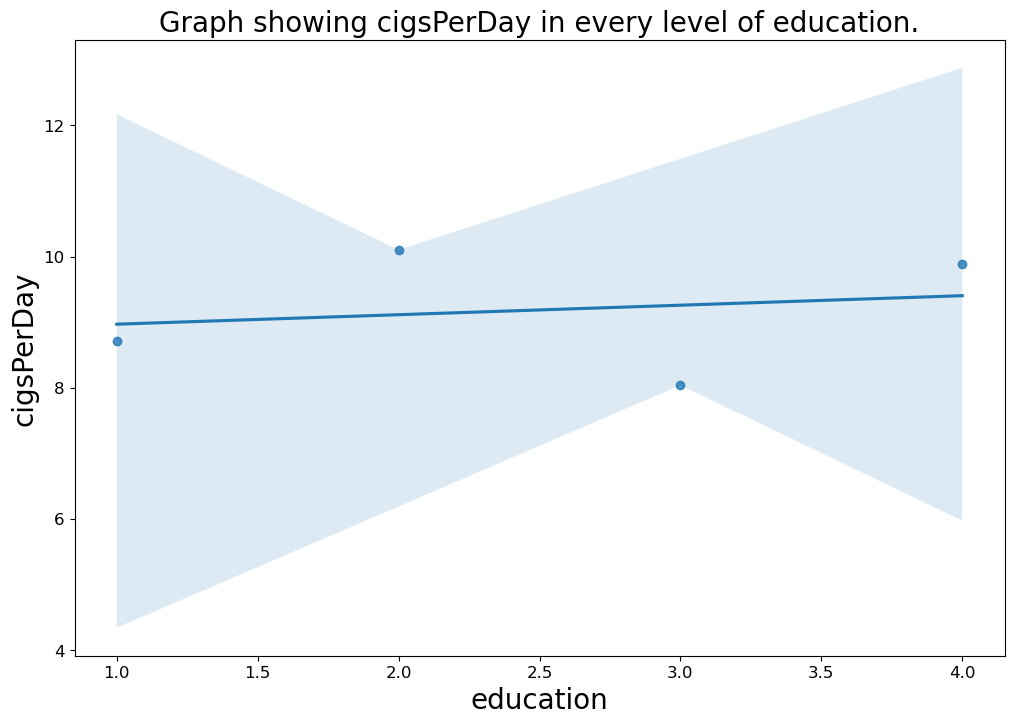

In [50]:
graph_1 = data_cr.groupby("education", as_index=False).cigsPerDay.mean()
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"])
plt.title("Graph showing cigsPerDay in every level of education.", size=20)
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)   

There is no linear relationship observed.
Level 3 education shows the lowest mean.

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

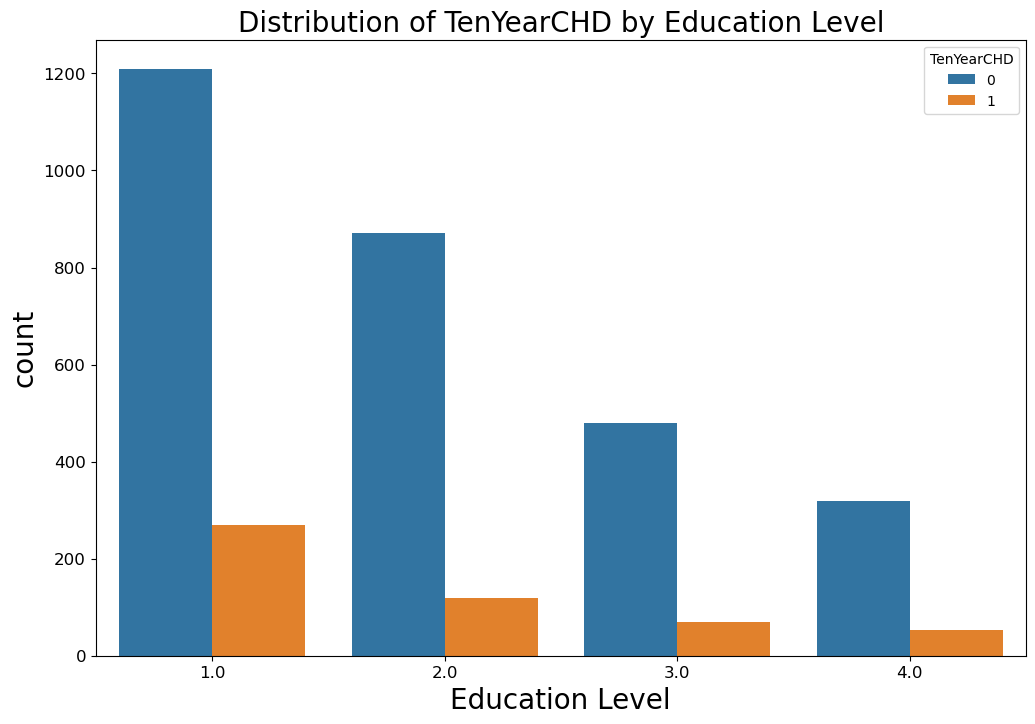

In [51]:
plt.figure(figsize=(12,8), facecolor='w')
sns.countplot(x='education', hue='TenYearCHD', data=data_cr)
plt.title("Distribution of TenYearCHD by Education Level", size=20)
plt.xlabel("Education Level", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)


There seem to be a slight increase of risk as lower education received.

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

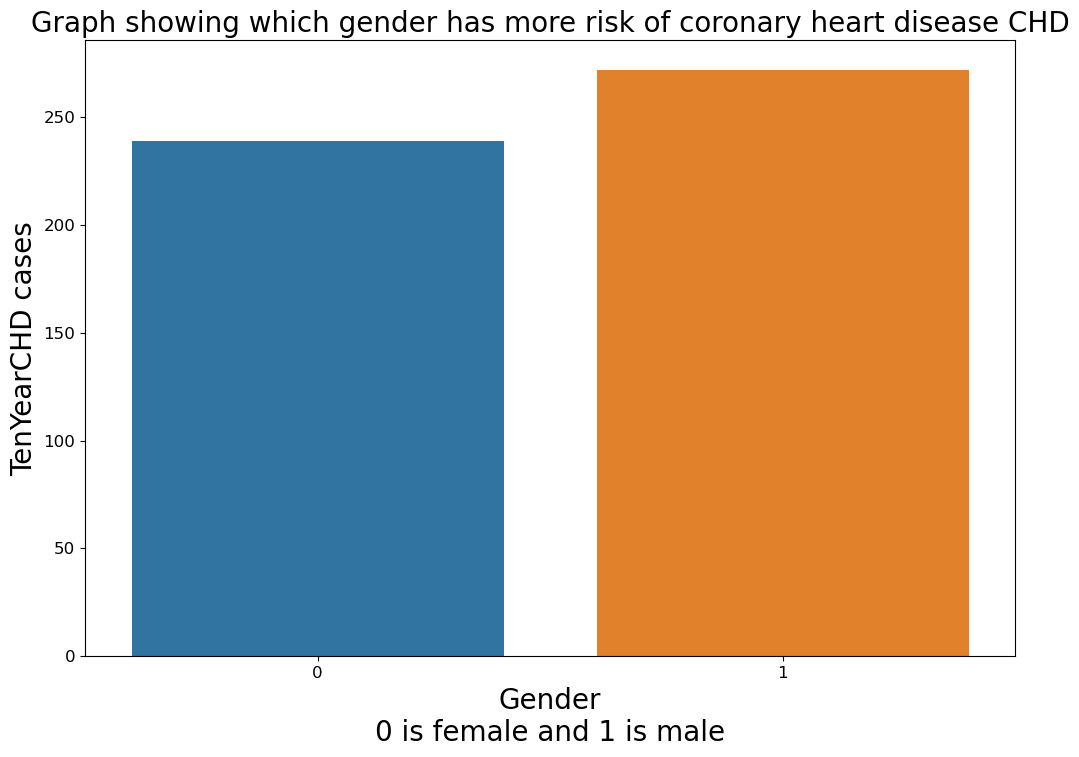

In [52]:
#Ploting the above values
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = data_cr.groupby("Gender", as_index=False).TenYearCHD.sum()
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["Gender"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

 According to this dataset, males have shown a slighly higher risk of coronary heart disease TenYearCHD.

#### Percentage of Gender Distribution

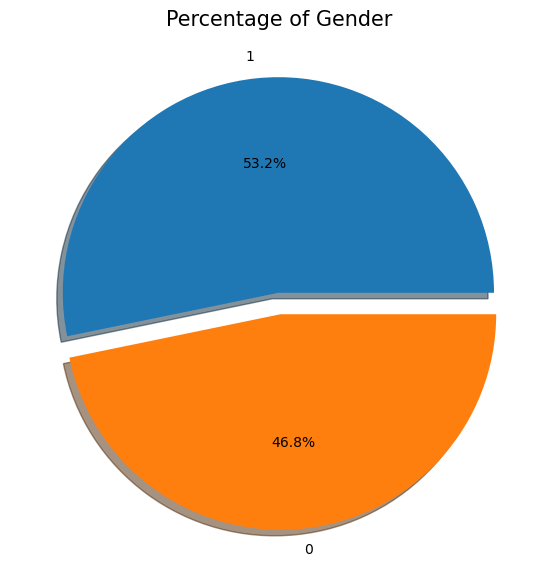

In [53]:
# Visualizing by pie chart
Male=data_cr[data_cr["Gender"]== 1].sum()
Female=data_cr[data_cr["Gender"]== 0].sum()

# Set labels
Sex_grp={"1":Male["TenYearCHD"],"0":Female["TenYearCHD"]}
plt.gcf().set_size_inches(7,7)
plt.pie(Sex_grp.values(),labels=Sex_grp.keys(), explode=[0.05, 0.05], autopct ='%1.1f%%', shadow = True);
plt.title("Percentage of Gender", fontsize=15)
plt.show()

From the above chart, we got to know that the gender distribution is not even with high count for females. 53.2% ratio are there for males and 46.8% ratio for females.

#### Chart - 8 : CHD for smoking cigarette

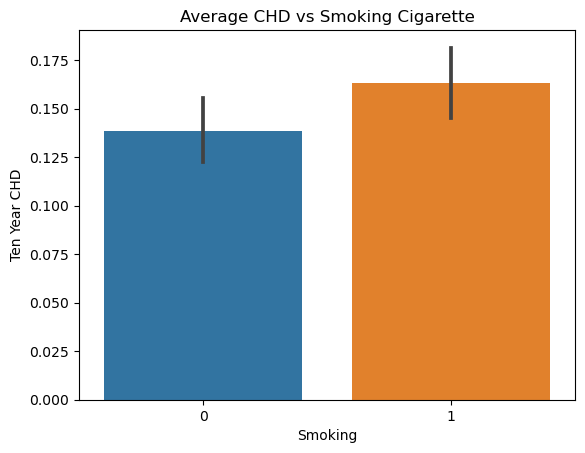

In [54]:
# Plot for Ten year CHD for smoking cigarette
sns.barplot(x='is_smoking',y='TenYearCHD',data=data_cr)
plt.ylabel("Ten Year CHD")
plt.xlabel("Smoking")
plt.title('Average CHD vs Smoking Cigarette')
plt.show()

From above barplot we got to know that:

There is low chances of CHD for non smokers compare to smoking persons

#### Relation between systolic_bp and risk of CHD.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

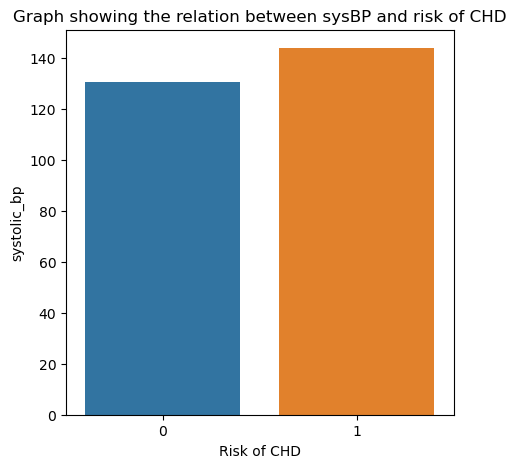

In [55]:
# Grouping up the data and ploting it

graph_3 = data_cr.groupby("TenYearCHD", as_index=False).systolic_bp.mean()

plt.figure(figsize=(5,5), facecolor='w')
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["systolic_bp"])
plt.title("Graph showing the relation between sysBP and risk of CHD")
plt.xlabel("Risk of CHD")
plt.ylabel("systolic_bp")
plt.xticks()
plt.yticks()

#### Relation between age and totChol

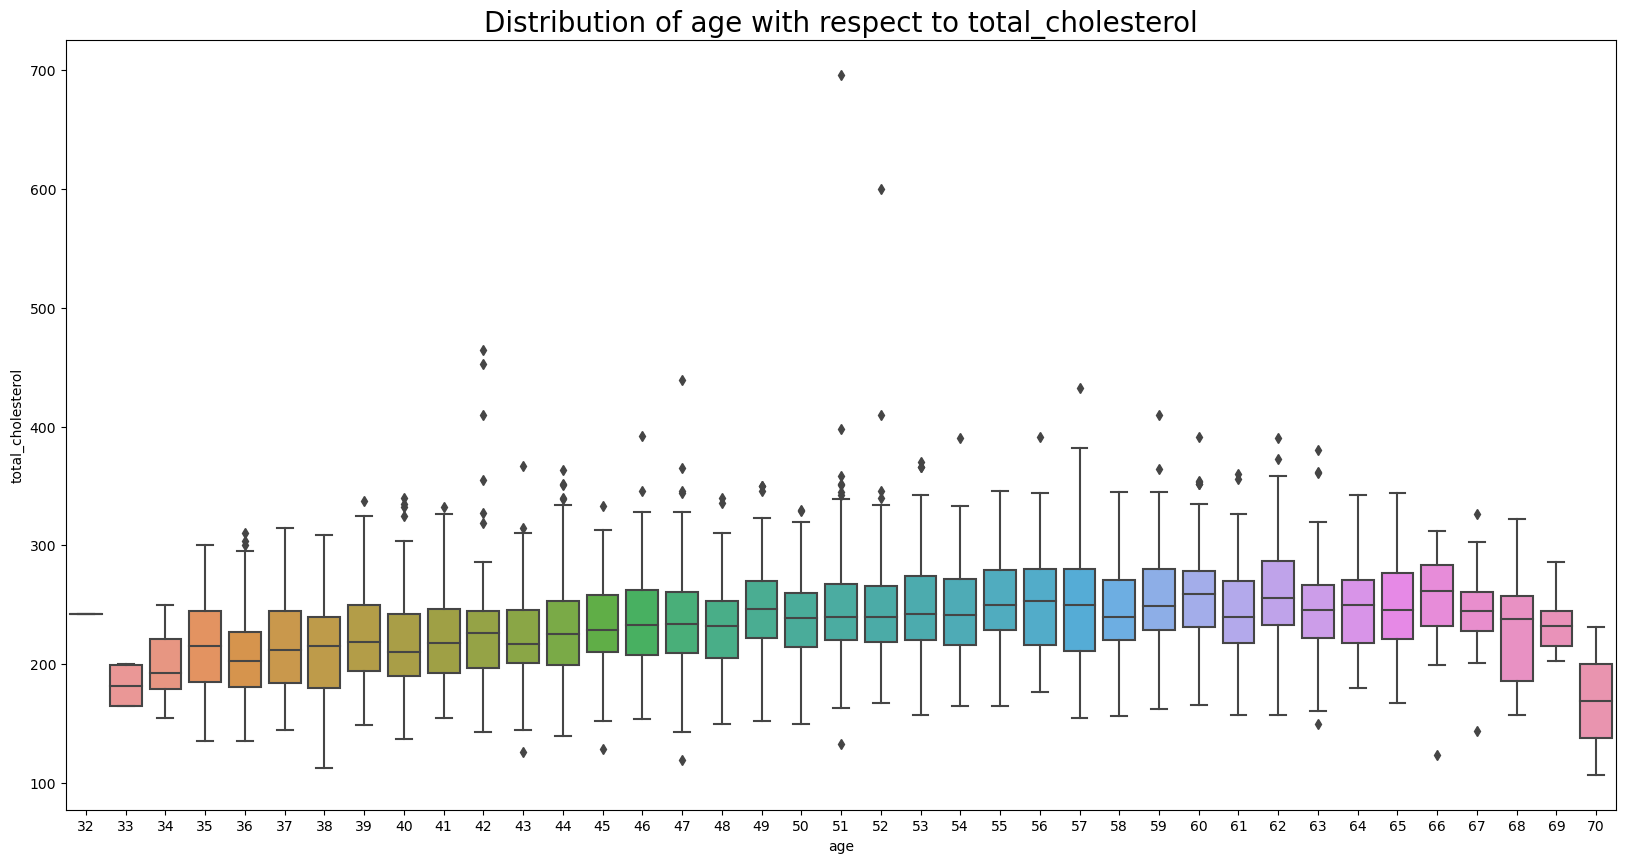

In [56]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y="total_cholesterol",data=data_cr)
plt.title("Distribution of age with respect to total_cholesterol", size=20)
plt.show()

The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

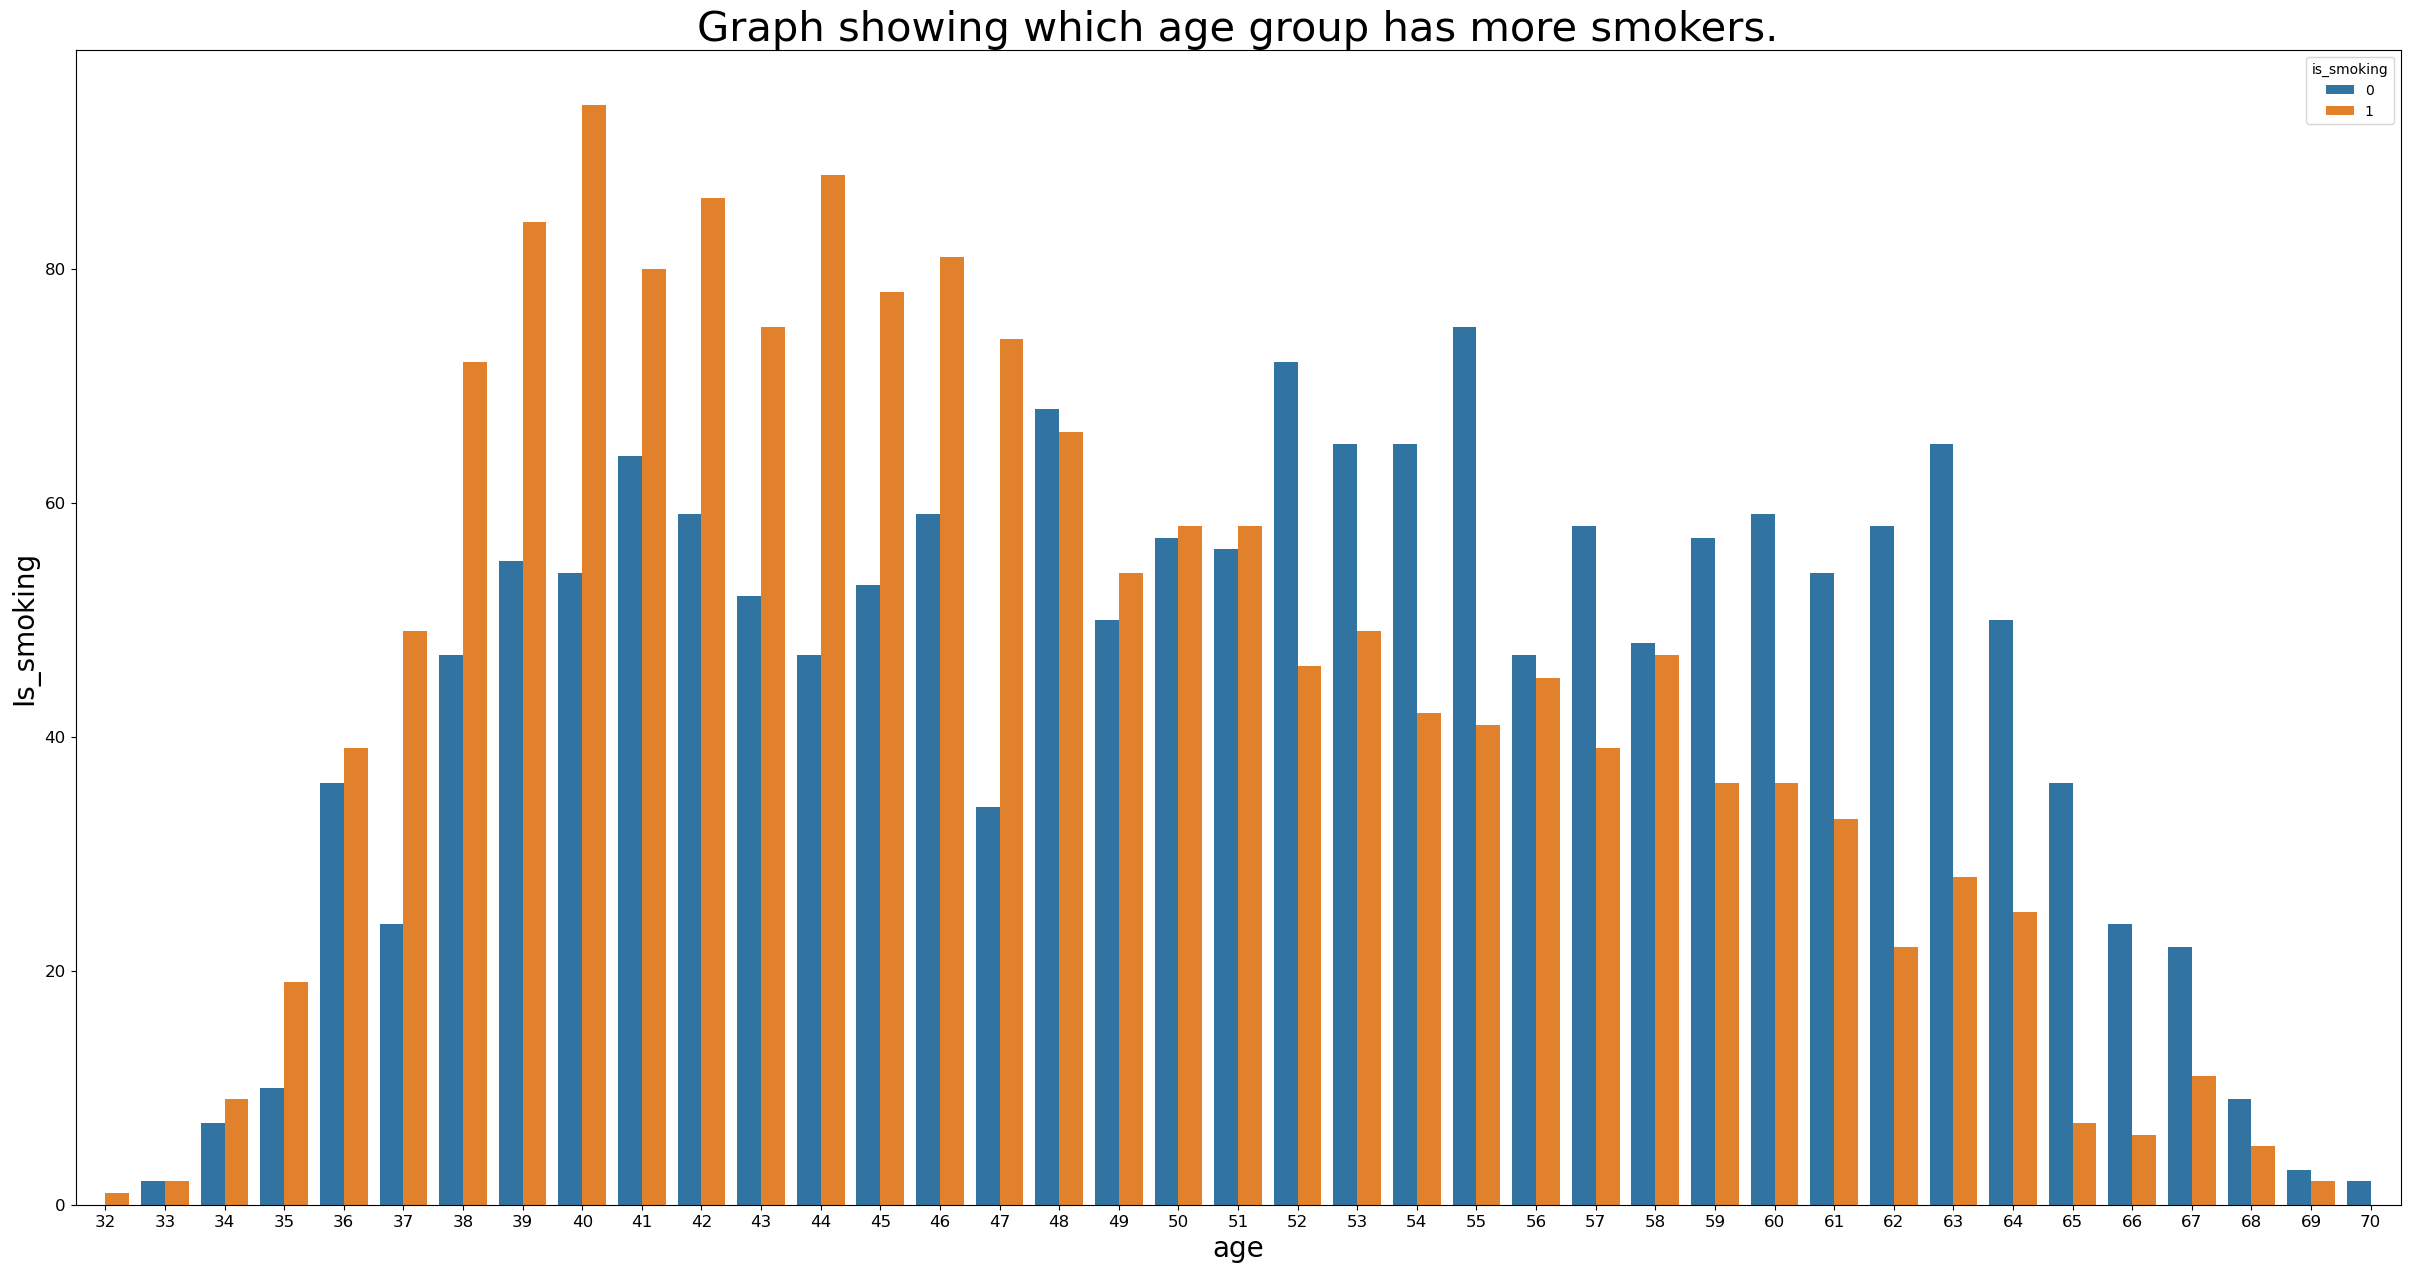

In [57]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data_cr,hue="is_smoking")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("Is_smoking", size=20)
plt.xticks(size=12)
plt.yticks(size=12)


Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers
No smokers observed below the age of 32
maximum age for a smokers is 70

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

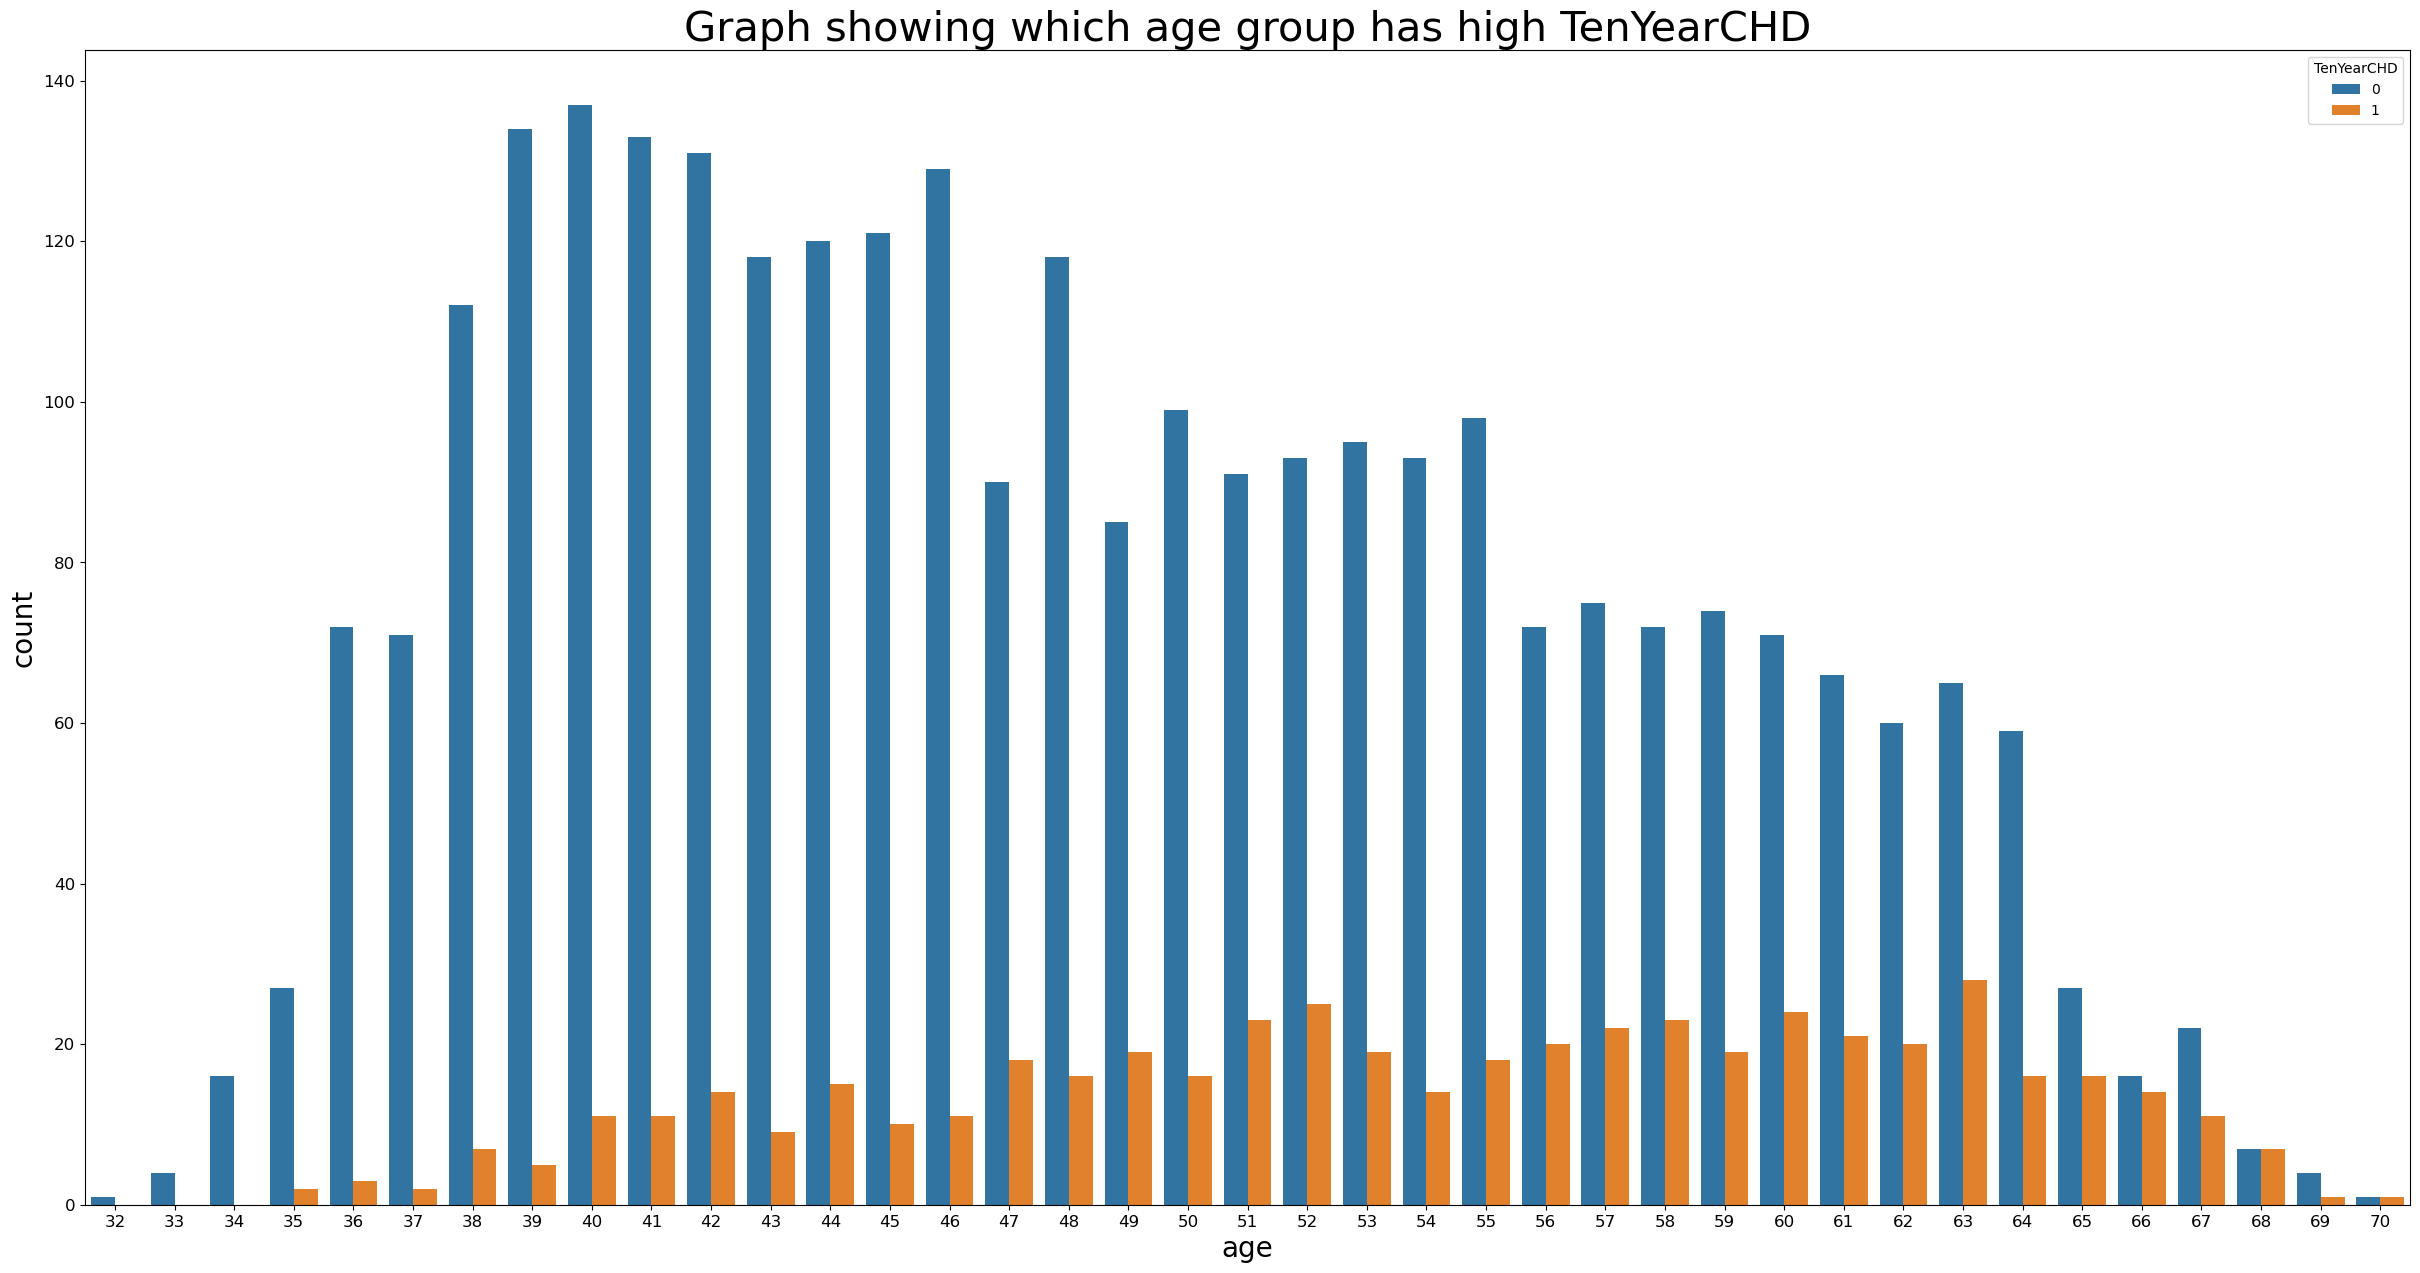

In [58]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data_cr,hue="TenYearCHD")
plt.title("Graph showing which age group has high TenYearCHD", size=30)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)


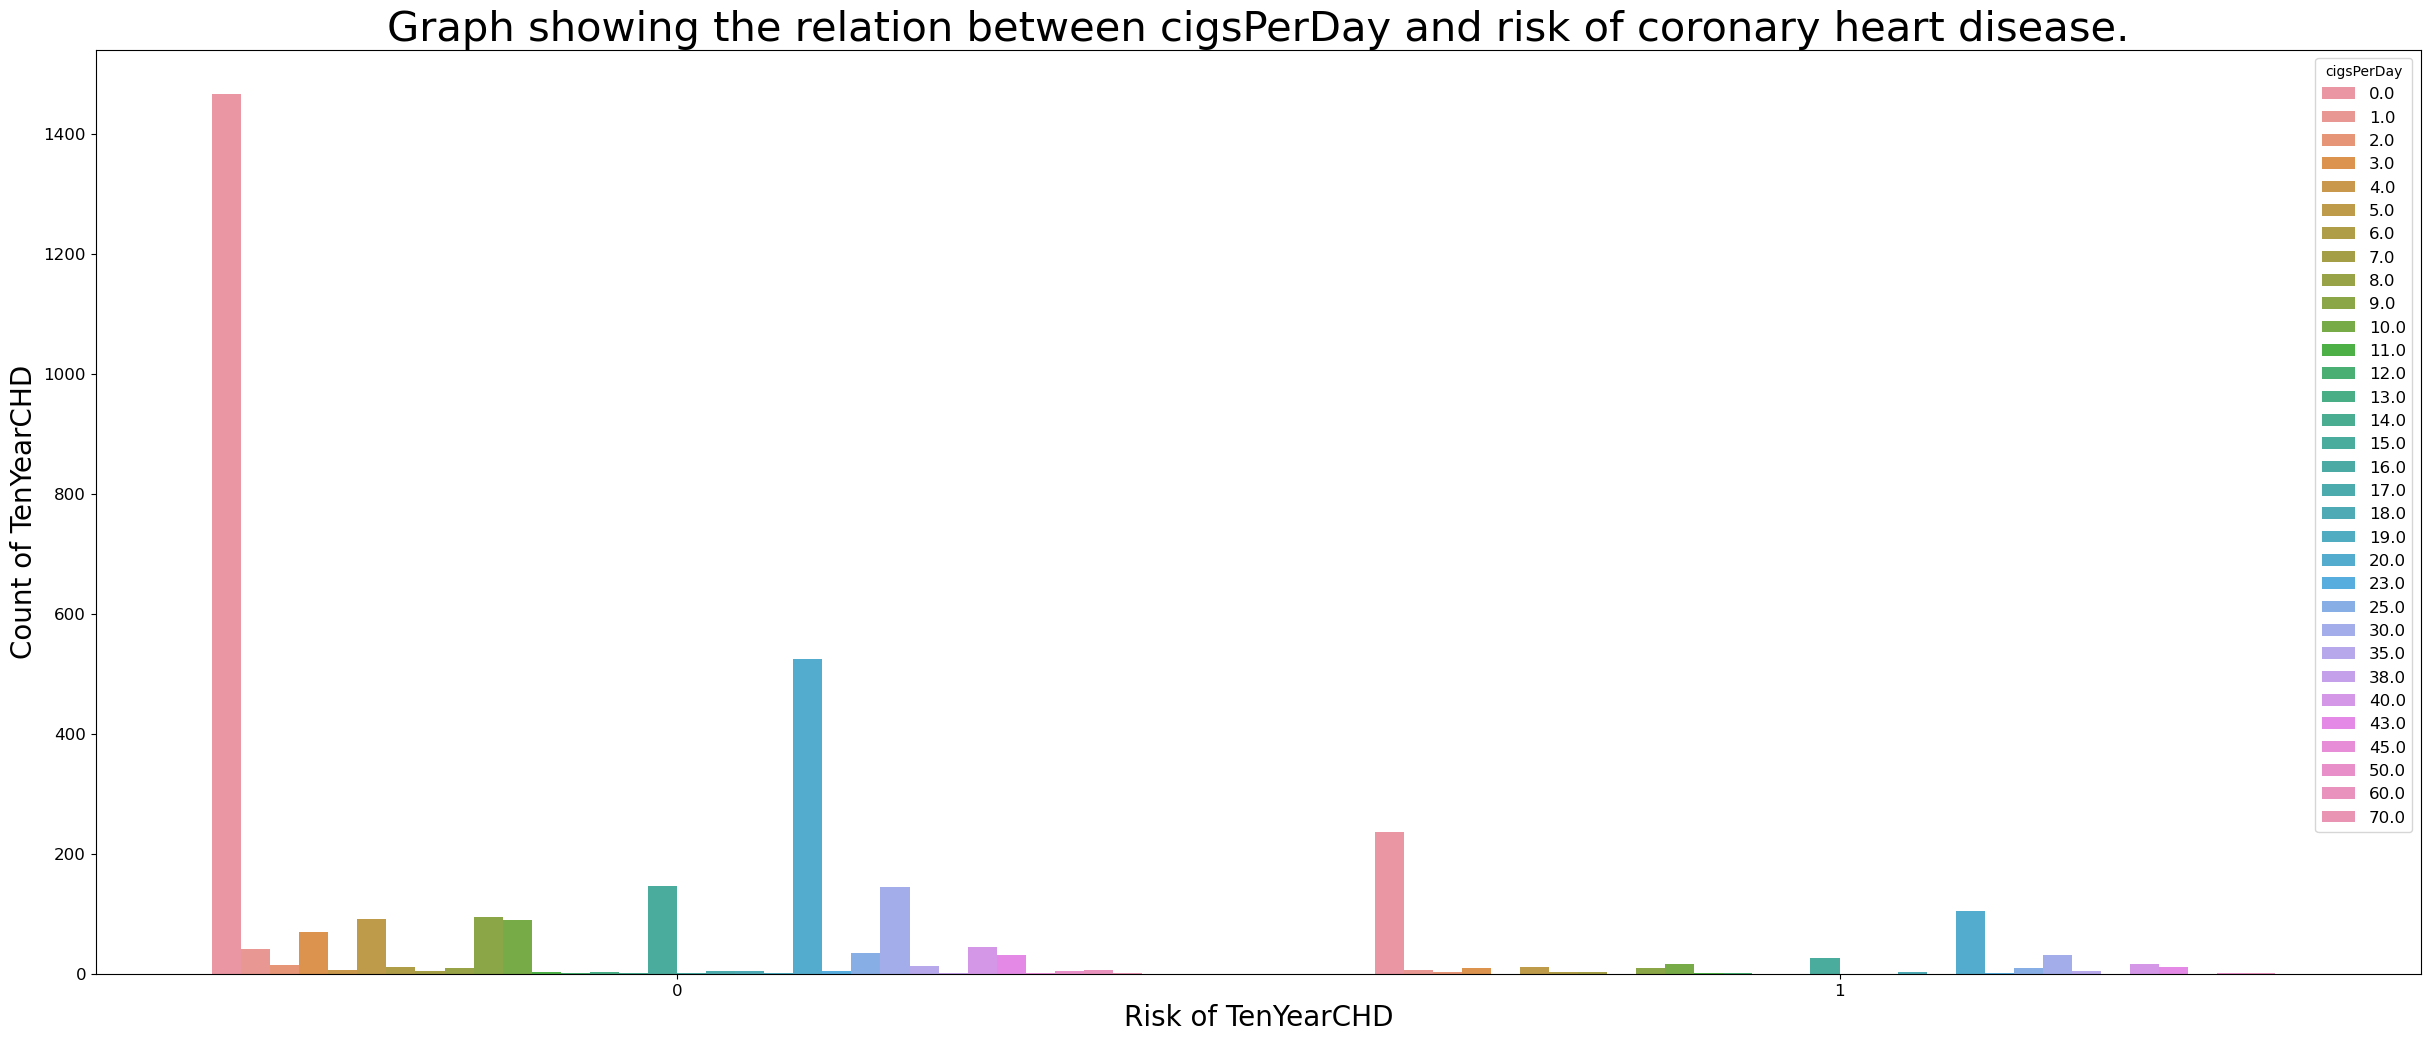

In [59]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=data_cr,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Low cigsPerDay comes with lower risk of CHD.
Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease
Although that is the case, low cigsPerDay doesn't actually guarantee a much lower risk of CHD

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

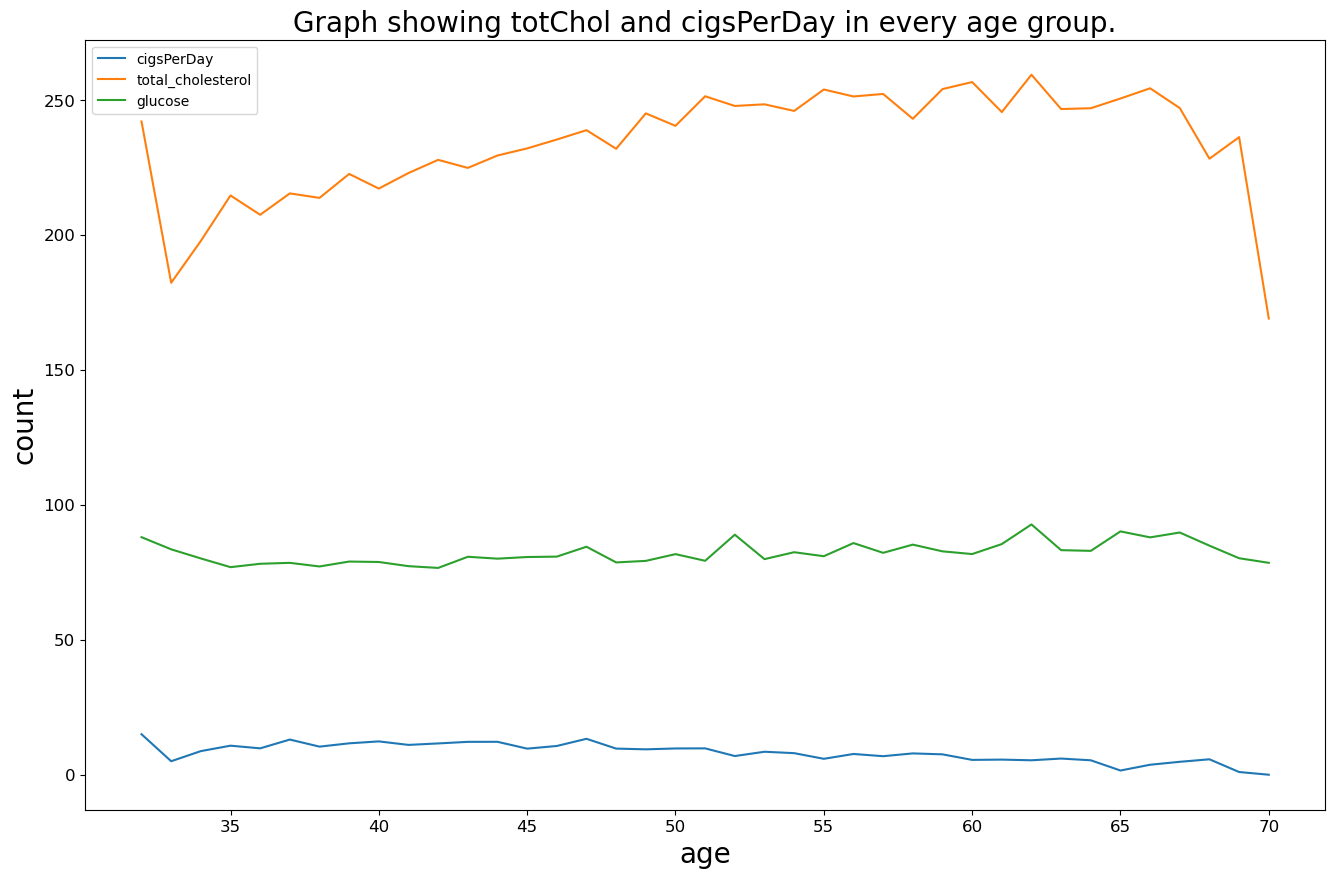

In [60]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, total_cholesterol, glucose.

graph_5 = data_cr.groupby("age").cigsPerDay.mean()
graph_6 = data_cr.groupby("age").total_cholesterol.mean()
graph_7 = data_cr.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="total_cholesterol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

There is a minor relation between totChol and glucose.
totChol has a steep, linear and inverse graph for lower ranges of age
cigsPerDay has a fairly parallel relationship with age

#### Distribution of sysBP vs diaBP with respect to currentSmoker and Gender attributes

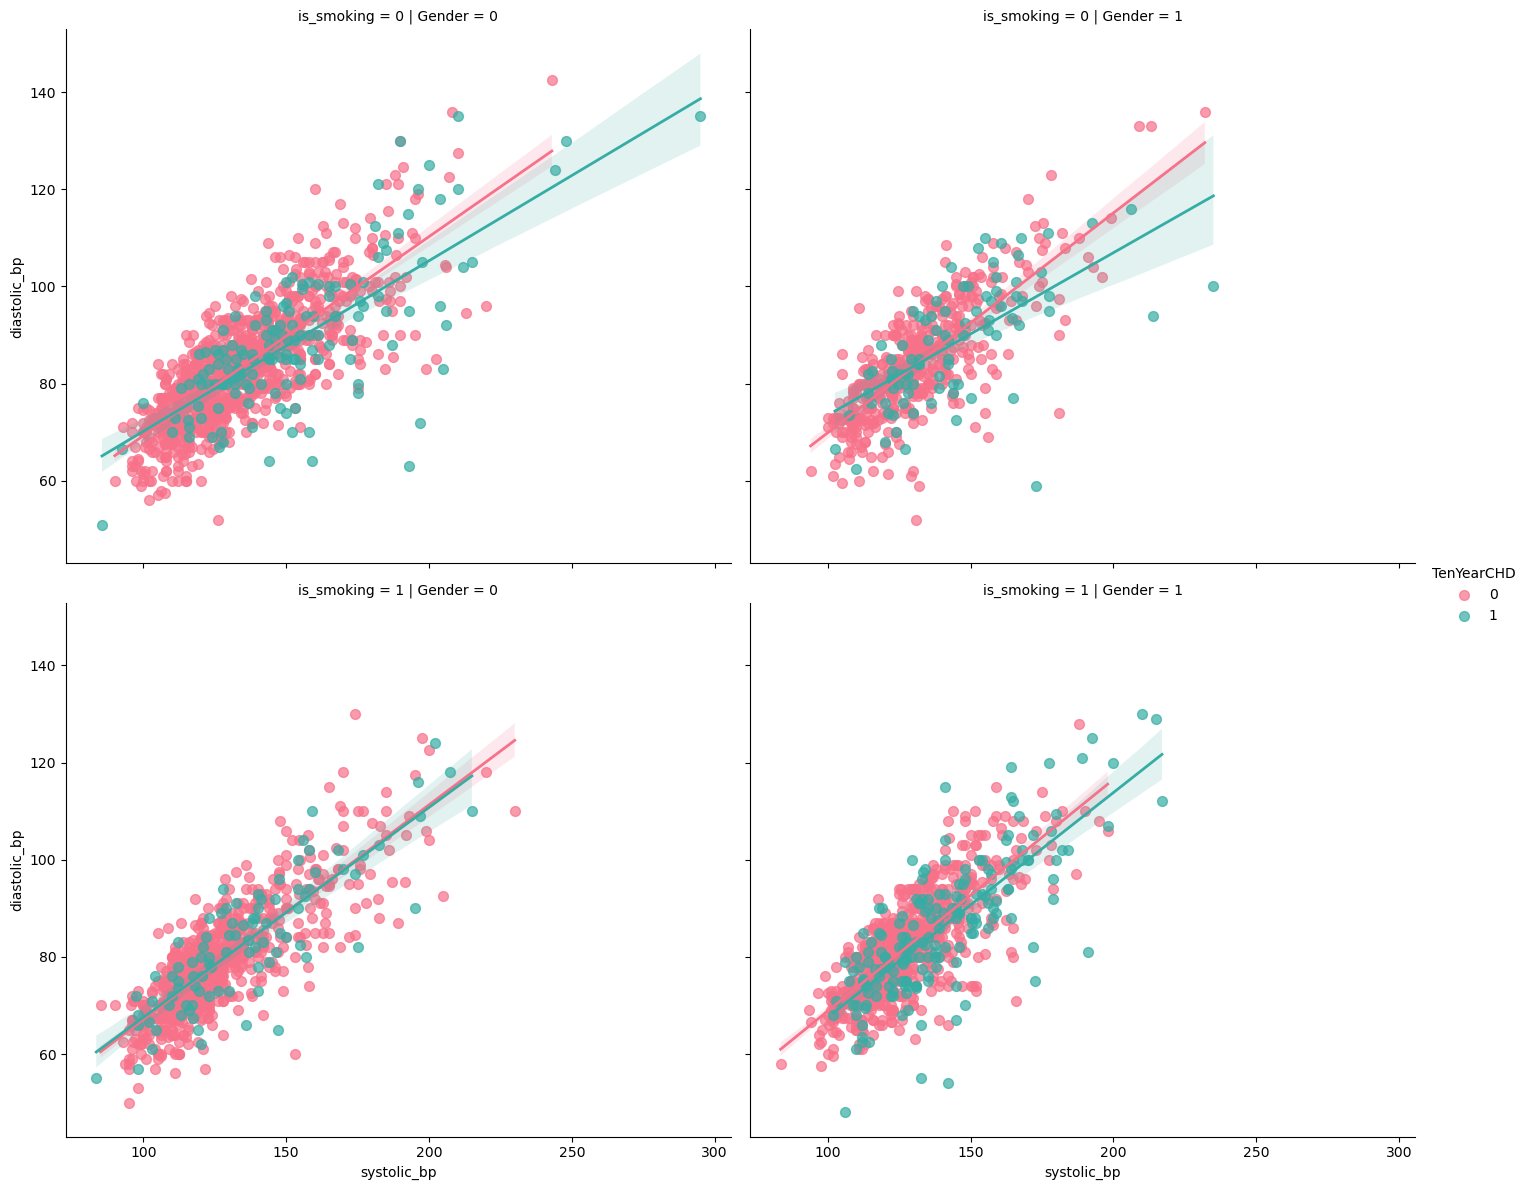

In [61]:
sns.lmplot(x='systolic_bp', y='diastolic_bp', 
           data=data_cr,
           hue='TenYearCHD', 
           col='Gender',  
           row='is_smoking', 
           palette='husl', 
           scatter_kws={'s': 50, 'alpha': 0.7}, 
           line_kws={'lw': 2},  
           height=6, aspect=1.2) 

# Show the plot
plt.show()


The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

####  Dependent variable with categorical variables (Bivariate)

<Figure size 1000x500 with 0 Axes>

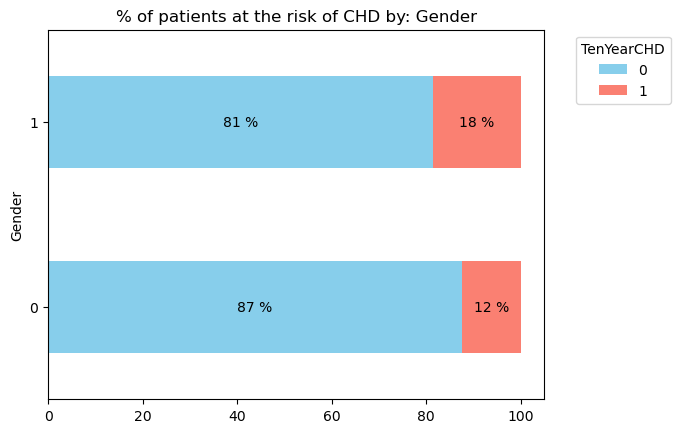

<Figure size 1000x500 with 0 Axes>

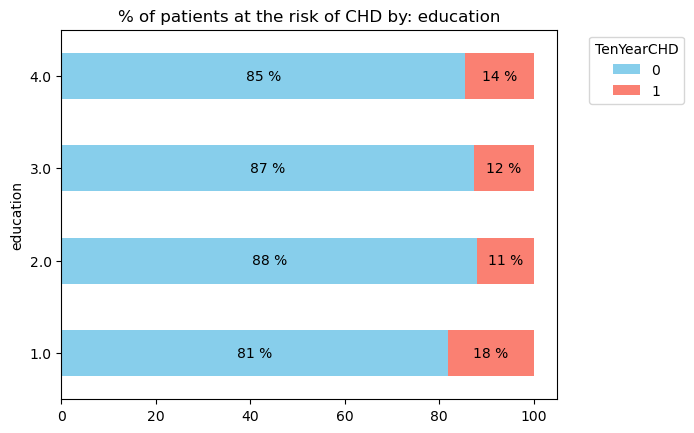

<Figure size 1000x500 with 0 Axes>

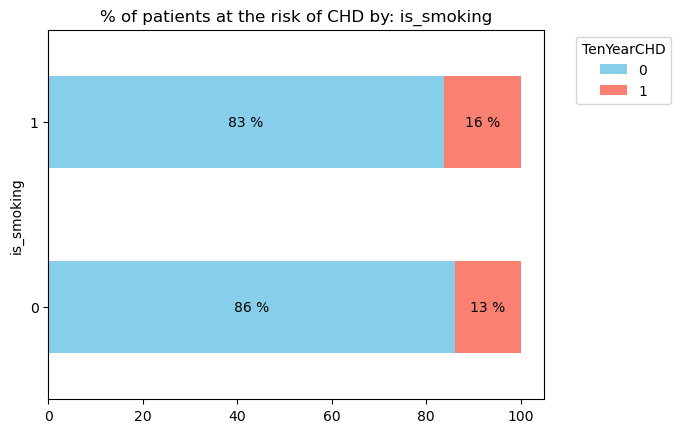

<Figure size 1000x500 with 0 Axes>

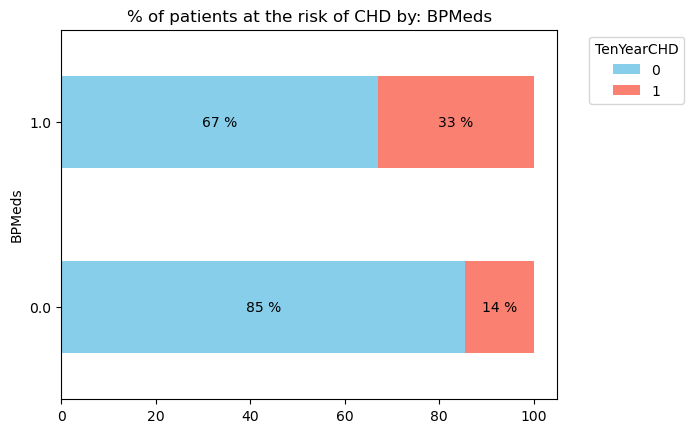

<Figure size 1000x500 with 0 Axes>

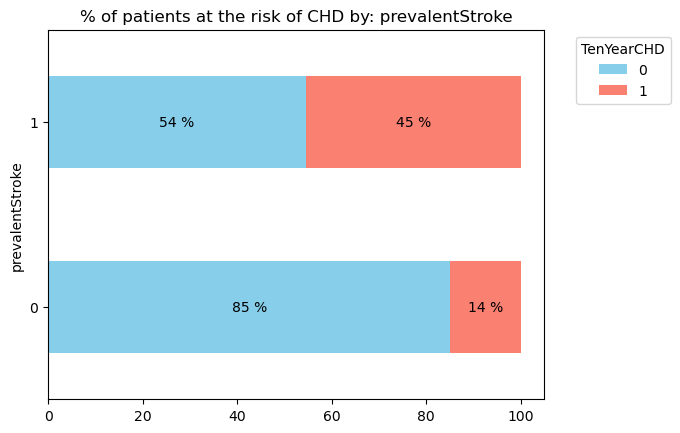

<Figure size 1000x500 with 0 Axes>

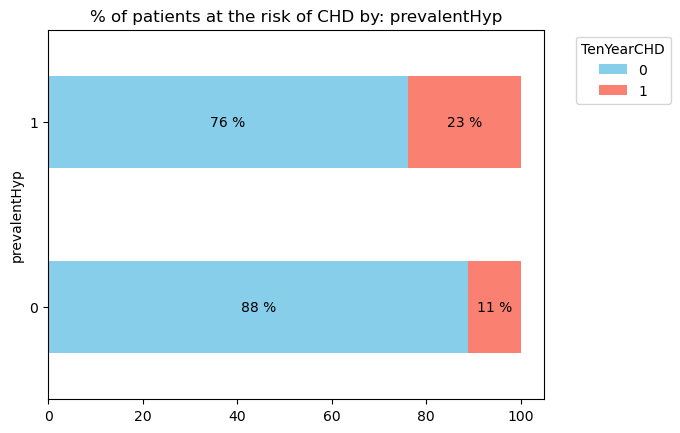

<Figure size 1000x500 with 0 Axes>

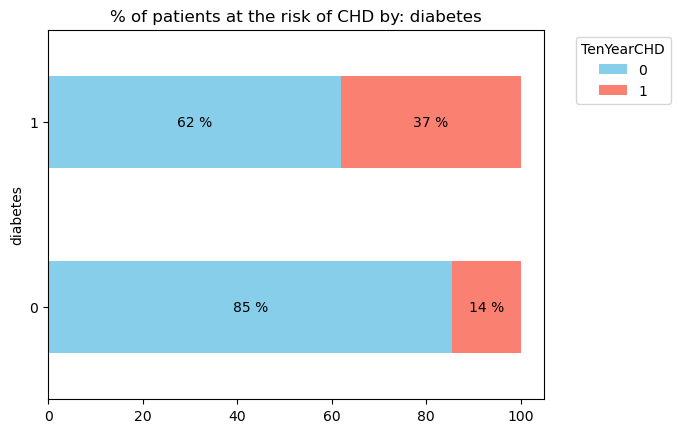

In [62]:
# percentage of TenYearCHD with respect to each of the categorical variable
for i in cat_var:
    x_var, y_var = i, 'TenYearCHD'
    plt.figure(figsize=(10,5))
    df_grouped = data_cr.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    colors = ['skyblue', 'salmon']
    df_grouped.plot.barh(stacked=True , color = colors)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
plt.show()

The percentage of CHD as per education does not provide much information as it is similar throughout the different education categories.

For sex we see that there is a slightly higher chance of CHD in male than in female.

For is_smoking again a very slightly high percentage of CHD is seen for the positive category of is_smoking.

For bp_meds and diabetes, we see high percentage of CHD for positive cases compared to the negative case.

Finally for the positive prevalent_stroke, the percentage is almost half indicating that the positive CHD is high for positive prevalent_stroke.

In [63]:
# Dropping "is_smoking" and "BP_Meds" column
data_cr.drop(['is_smoking', 'BPMeds'], axis=1, inplace=True)

 Dropping is_smoking column as we are having cigs_per_day column which indicates the person is smoking or not,
Similarly from the above analysis we observe that Persons who are taking medications for BP are having Prevalent Hyp, that is  the patient was hypertensive.


age  education    Gender  cigsPerDay  prevalentStroke  \
age                1.000000  -0.170614 -0.041882   -0.191587         0.059038   
education         -0.170614   1.000000  0.025275    0.014158        -0.031820   
Gender            -0.041882   0.025275  1.000000    0.331515        -0.011273   
cigsPerDay        -0.191587   0.014158  0.331515    1.000000        -0.042424   
prevalentStroke    0.059038  -0.031820 -0.011273   -0.042424         1.000000   
prevalentHyp       0.308826  -0.081925  0.003072   -0.080009         0.071652   
diabetes           0.107875  -0.051895  0.008853   -0.049848         0.010115   
total_cholesterol  0.271961  -0.021221 -0.070042   -0.023534        -0.010769   
systolic_bp        0.404845  -0.132202 -0.037369   -0.100279         0.057568   
diastolic_bp       0.221896  -0.060774  0.058840   -0.068486         0.047235   
BMI                0.137478  -0.135783  0.087093   -0.101166         0.017032   
heartRate         -0.002636  -0.039395 -0.118707    0.066484        -0.019183   
glucose            0.113058  -0.040193  0.000111   -0.064337         0.024064   
TenYearCHD         0.224927  -0.051388  0.084647    0.064745         0.068627   

                   prevalentHyp  diabetes  total_cholesterol  systolic_bp  \
age                    0.308826  0.107875           0.271961     0.404845   
education             -0.081925 -0.051895          -0.021221    -0.132202   
Gender                 0.003072  0.008853          -0.070042    -0.037369   
cigsPerDay            -0.080009 -0.049848          -0.023534    -0.100279   
prevalentStroke        0.071652  0.010115          -0.010769     0.057568   
prevalentHyp           1.000000  0.082565           0.158693     0.699285   
diabetes               0.082565  1.000000           0.059194     0.124011   
total_cholesterol      0.158693  0.059194           1.000000     0.197848   
systolic_bp            0.699285  0.124011           0.197848     1.000000   
diastolic_bp           0.612897  0.061165           0.153825     0.781908   
BMI                    0.299615  0.087793           0.113452     0.331730   
heartRate              0.150731  0.039746           0.086955     0.178135   
glucose                0.082986  0.609351           0.061317     0.138203   
TenYearCHD             0.166544  0.103681           0.093605     0.212703   

                   diastolic_bp       BMI  heartRate   glucose  TenYearCHD  
age                    0.221896  0.137478  -0.002636  0.113058    0.224927  
education             -0.060774 -0.135783  -0.039395 -0.040193   -0.051388  
Gender                 0.058840  0.087093  -0.118707  0.000111    0.084647  
cigsPerDay            -0.068486 -0.101166   0.066484 -0.064337    0.064745  
prevalentStroke        0.047235  0.017032  -0.019183  0.024064    0.068627  
prevalentHyp           0.612897  0.299615   0.150731  0.082986    0.166544  
diabetes               0.061165  0.087793   0.039746  0.609351    0.103681  
total_cholesterol      0.153825  0.113452   0.086955  0.061317    0.093605  
systolic_bp            0.781908  0.331730   0.178135  0.138203    0.212703  
diastolic_bp           1.000000  0.379684   0.174908  0.069430    0.135979  
BMI                    0.379684  1.000000   0.069491  0.088910    0.066134  
heartRate              0.174908  0.069491   1.000000  0.079789    0.020167  
glucose                0.069430  0.088910   0.079789  1.000000    0.133860  
TenYearCHD             0.135979  0.066134   0.020167  0.133860    1.000000

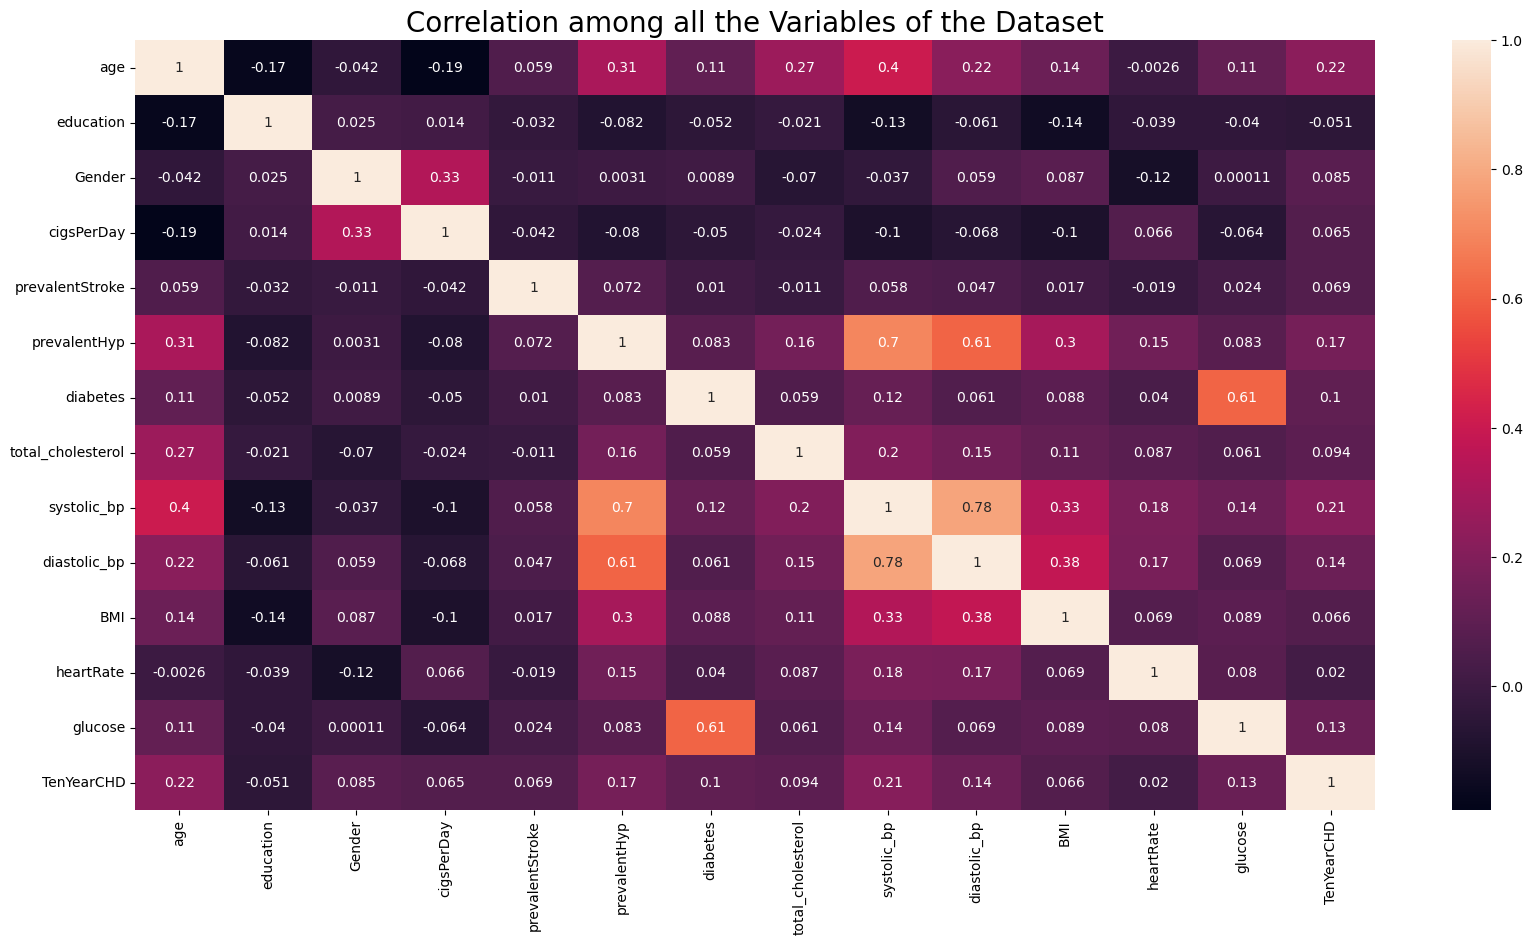

In [64]:
#Correlation Check and heat map analysis
cor=data_cr.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

In [65]:
data_cr.shape

(3390, 14)

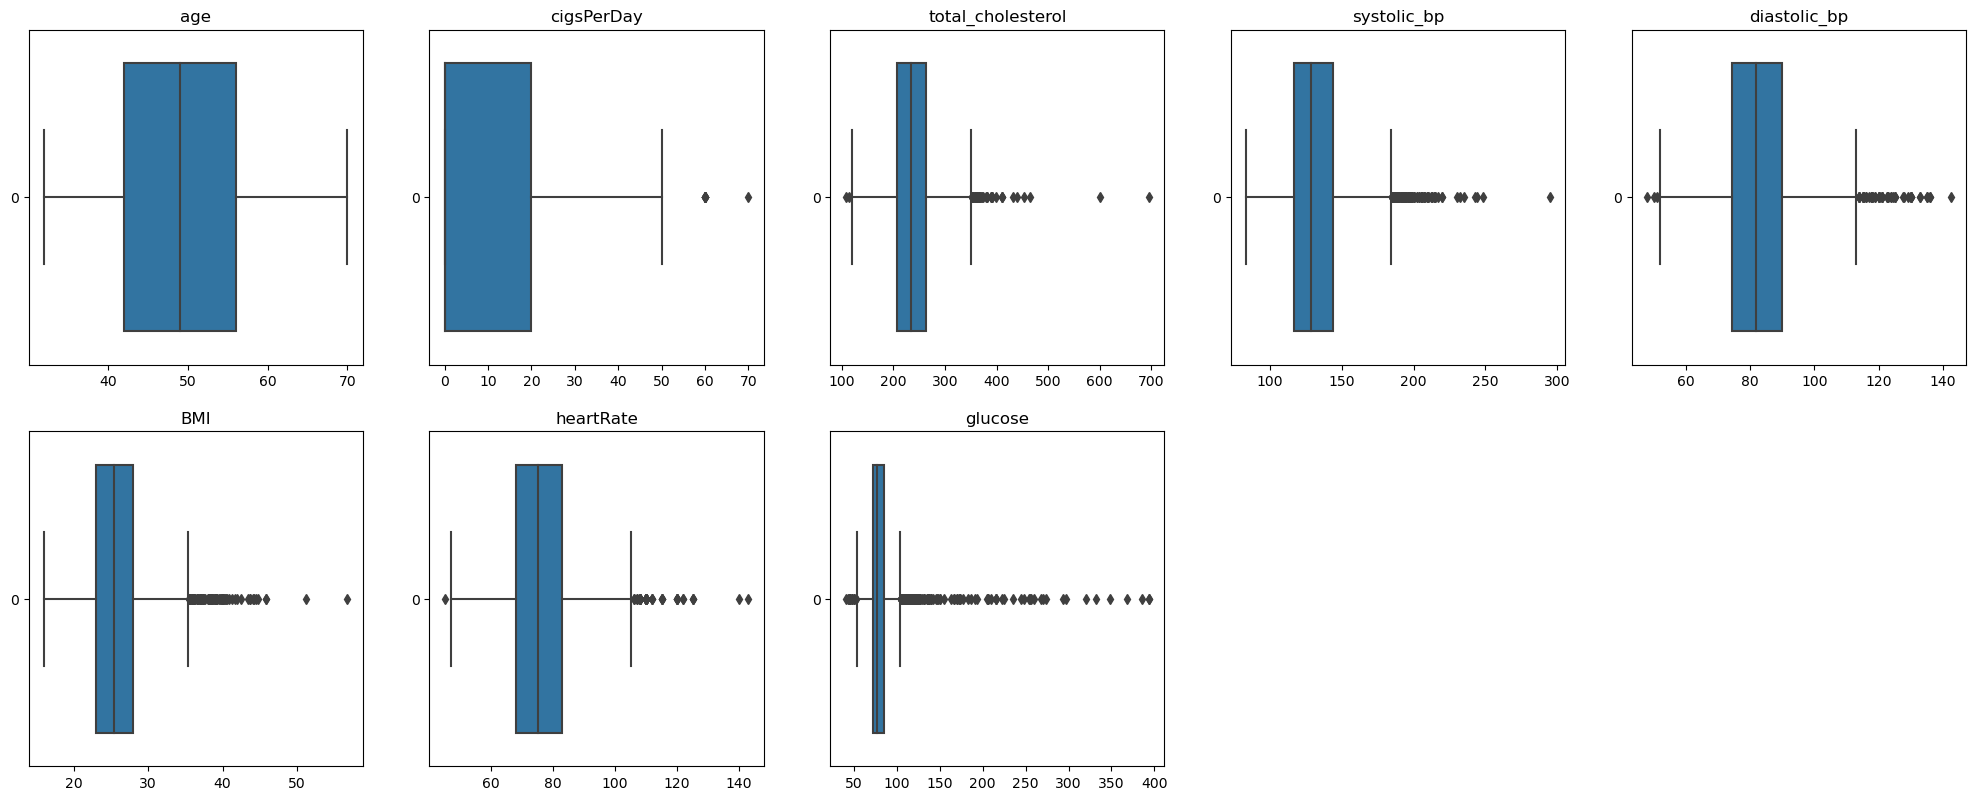

In [66]:
plt.figure(figsize=(25,20))
for index, col in enumerate(con_var, start=1):
    if col != 'ten_year_chd':
        plt.subplot(4,5,index)
        plt.title(col)
        ax = sns.boxplot(data_cr[col], orient='h')

In [67]:
# Handling Outliers
for col in con_var:
# Using IQR method to define the range of inliners:
    q1, q3, median = data_cr[col].quantile([0.25,0.75,0.5])
    lower_limit = q1 - 1.5*(q3-q1)
    upper_limit = q3 + 1.5*(q3-q1)
# Replacing Outliers with median value

    data_cr[col] = np.where(data_cr[col] > upper_limit, upper_limit, np.where(
                        data_cr[col] < lower_limit, lower_limit, data_cr[col]))


## Checking whether outliers are handled

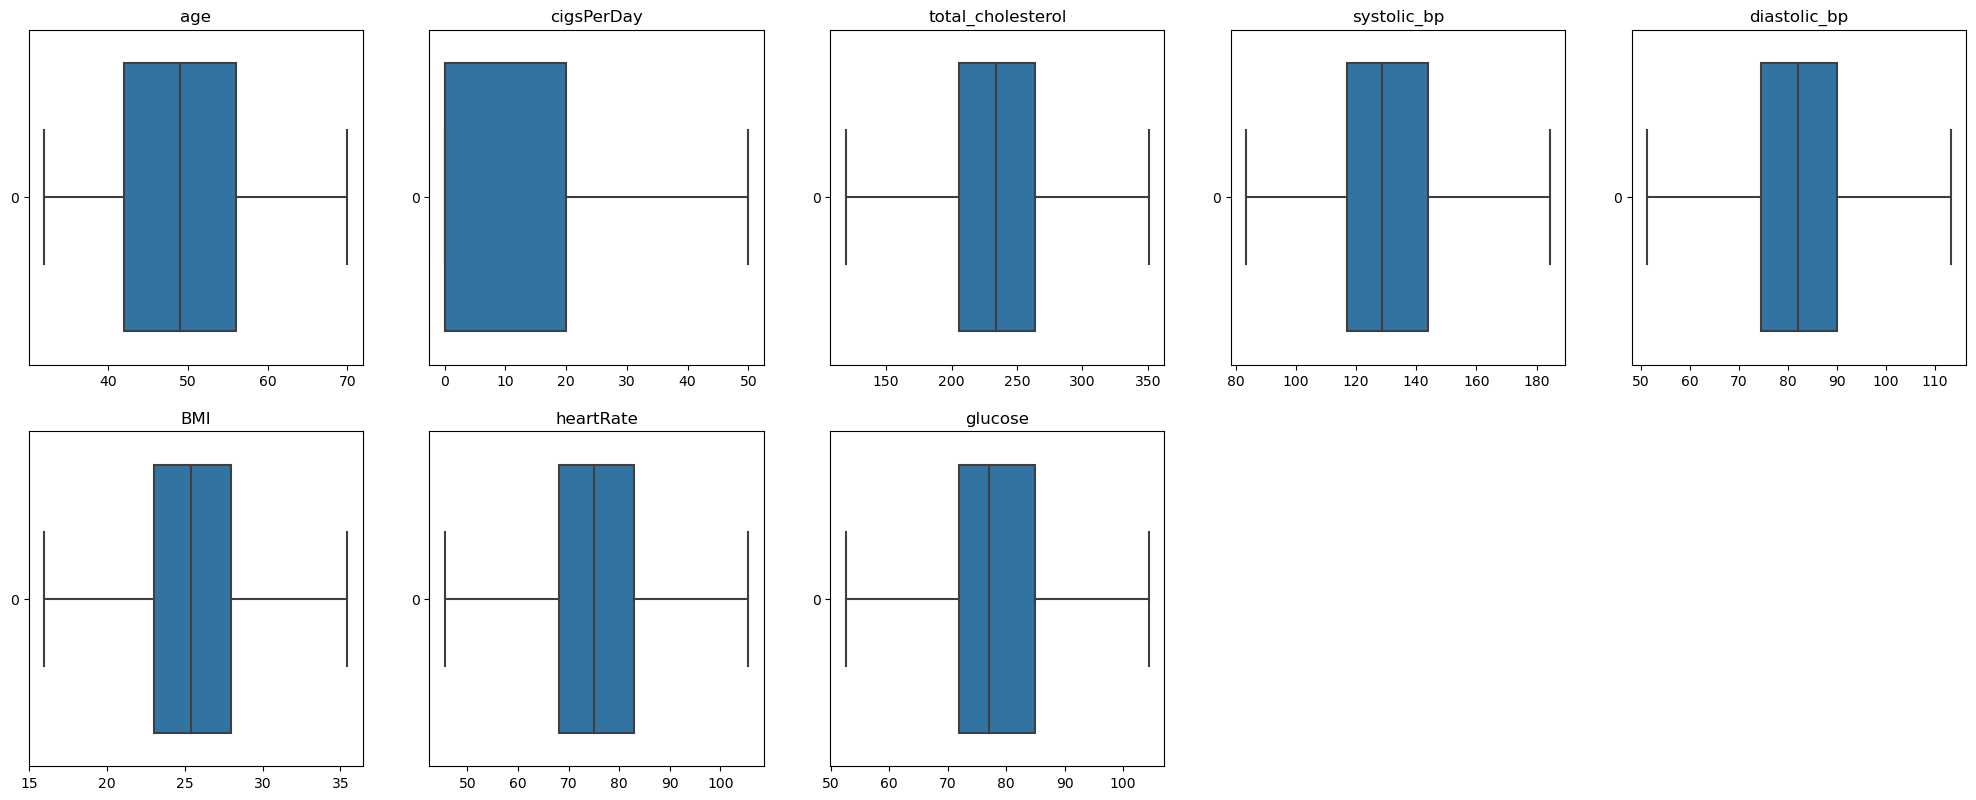

In [68]:
plt.figure(figsize=(25,20))
for index, col in enumerate(con_var, start=1):
    if col != 'ten_year_chd':
        plt.subplot(4,5,index)
        plt.title(col)
        ax = sns.boxplot(data_cr[col], orient='h')

# Handling Imbalance Dataset

In [69]:
class_1=data_cr[data_cr['TenYearCHD']==1]
class_0=data_cr[data_cr['TenYearCHD']==0]

In [70]:
# to perform up-sampling of the minority class, ensuring that both classes in the dataset have an equal number of samples
class_1=resample(class_1,replace=True,n_samples=len(class_0),random_state=40)

In [71]:
data_balance=pd.concat([class_0,class_1])
data_balance['TenYearCHD'].value_counts()

TenYearCHD
0    2879
1    2879
Name: count, dtype: int64

In [72]:
data=data_balance
np.shape(data)

(5758, 14)

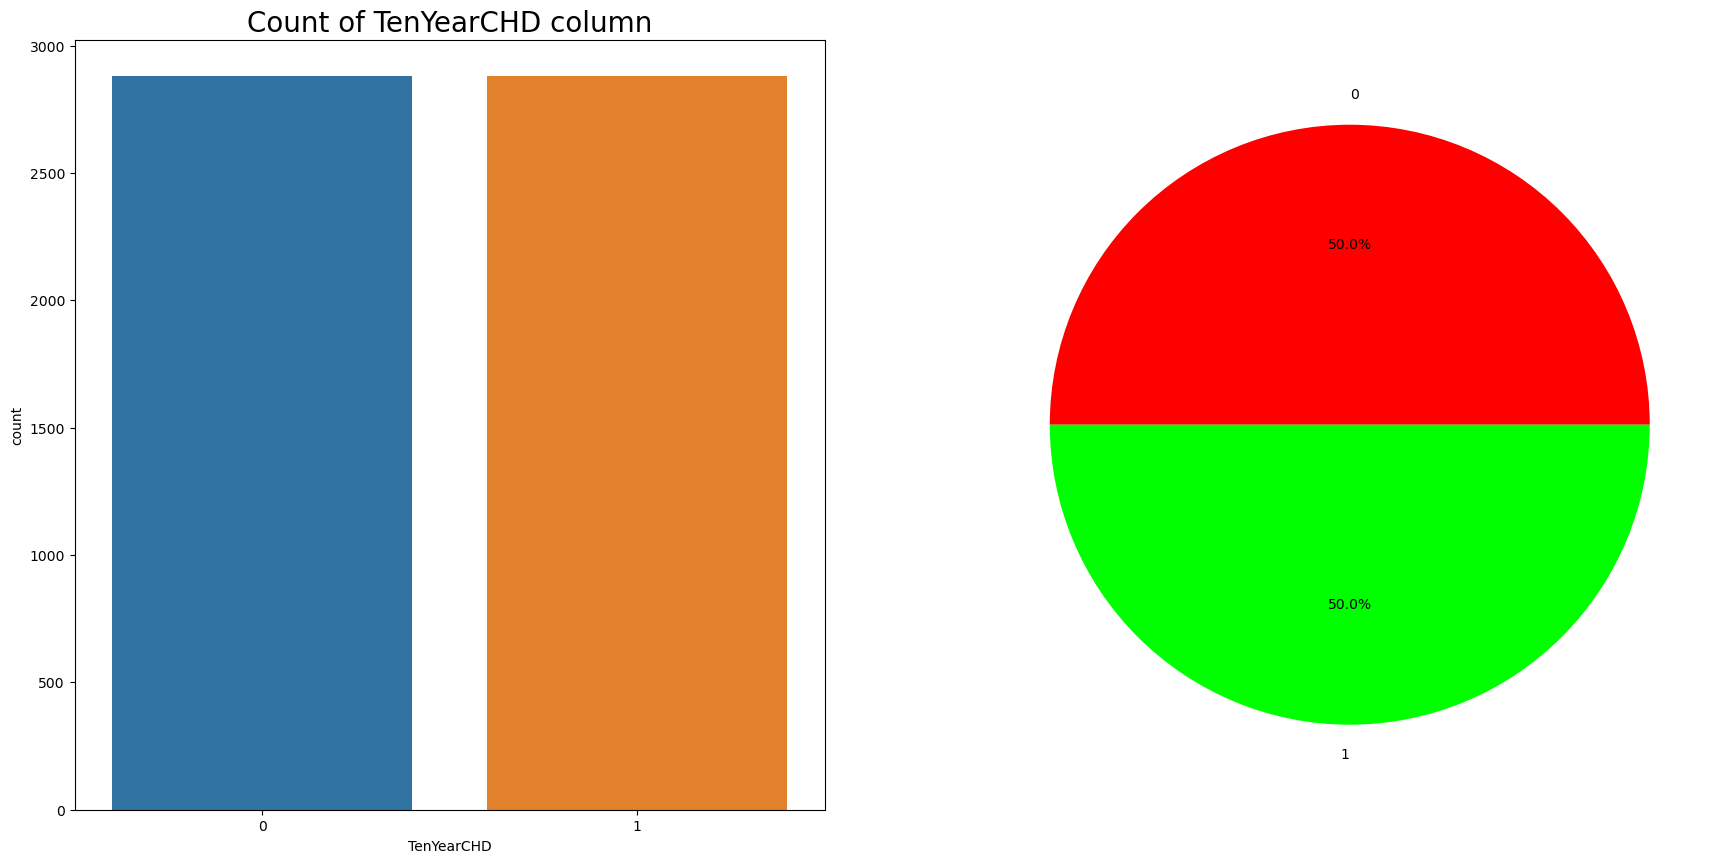

In [73]:
#Distribution of TenYearCHD in the balanced dataset
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

# Feature Selection

In [74]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
x=data.iloc[:,0:15]
y=data.iloc[:,-1]
print("The shape of x is:", x.shape)
print("The shape of y is:", y.shape)

The shape of x is: (5758, 14)
The shape of y is: (5758,)


In [75]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [76]:
fit=best.fit(x,y)

In [77]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)

In [78]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

              Feature        Score
13         TenYearCHD  2879.000000
8         systolic_bp  1554.529945
0                 age   835.058689
7   total_cholesterol   740.786670
3          cigsPerDay   556.055591
9        diastolic_bp   304.634966
5        prevalentHyp   190.878550
12            glucose   118.743262
6            diabetes    86.385214
2              Gender    39.129602
4     prevalentStroke    38.291139


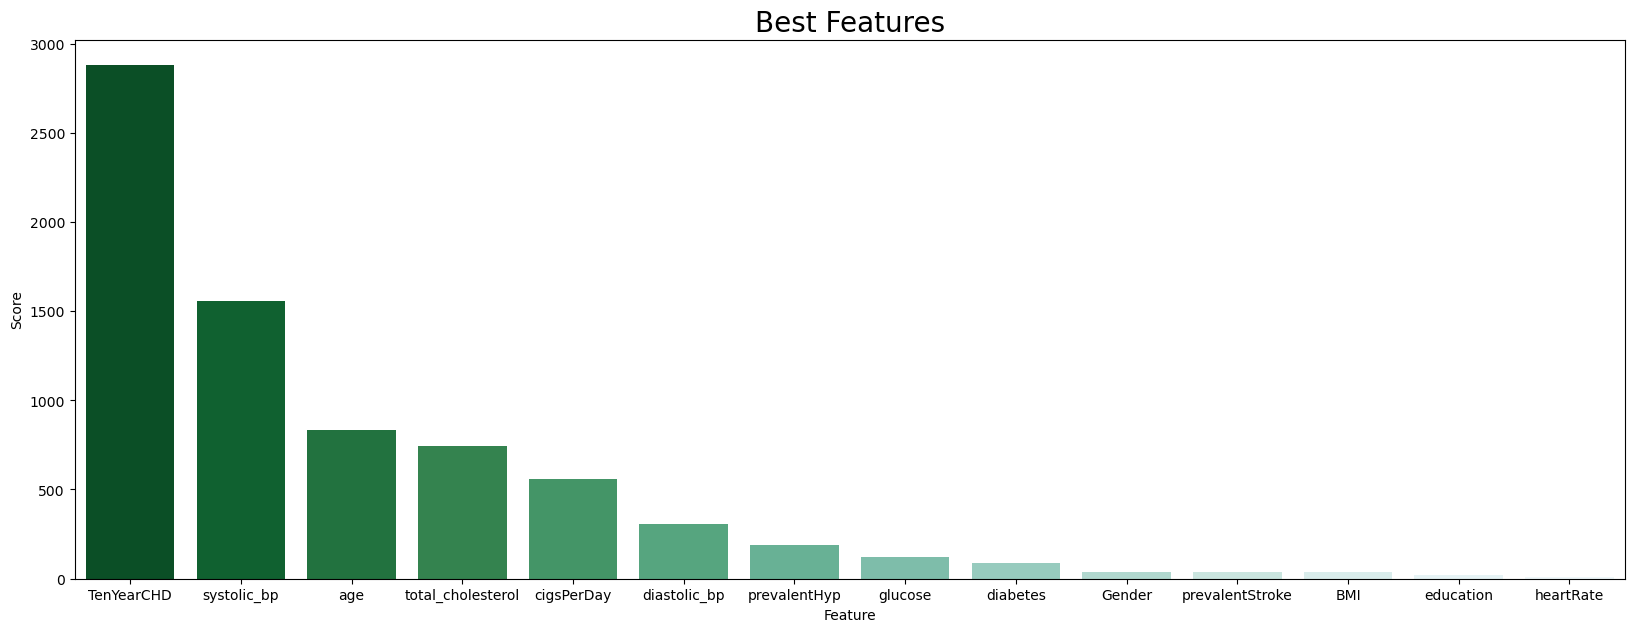

In [79]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Best Features", size=20)
plt.show()

In [80]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['TenYearCHD',
 'systolic_bp',
 'age',
 'total_cholesterol',
 'cigsPerDay',
 'diastolic_bp',
 'prevalentHyp',
 'glucose',
 'diabetes',
 'Gender']

In [81]:
data=data[['TenYearCHD',
 'systolic_bp',
 'age',
 'total_cholesterol',
 'cigsPerDay',
 'diastolic_bp',
 'prevalentHyp',
 'glucose',
 'diabetes',
 'Gender']]
data.head()

TenYearCHD  systolic_bp   age  total_cholesterol  cigsPerDay  diastolic_bp  \
1           0        168.0  36.0              212.0         0.0         98.00   
2           0        116.0  46.0              250.0        10.0         71.00   
4           0        136.5  64.0              241.0        30.0         85.00   
6           0        184.5  61.0              238.0         0.0        113.25   
7           0        102.0  36.0              295.0        35.0         68.00   

   prevalentHyp  glucose  diabetes  Gender  
1             1     75.0         0       1  
2             0     94.0         0       0  
4             0     77.0         0       0  
6             1     79.0         0       1  
7             0     63.0         0       1

In [82]:
x = data.drop(['TenYearCHD'], axis=1)
y = data['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [84]:
var_models = {
    "Logistic Regression": LogisticRegression(solver="liblinear", l1_ratio=0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss="exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=60, learning_rate=0.2),
    "XGBoost Classifier": XGBClassifier(),
}

for name, model in var_models.items():
    model.fit(x_train, y_train)
    print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XGBoost Classifier was completed.


In [85]:
# created a function to give classification report for each model created
def evaluation_report(y_true, y_pred, y_pred_proba):
    """
    This function prints evaluation metrics for a classification model.
        y_true: Actual labels.
        y_pred: Predicted labels.
        y_pred_proba: Predicted probabilities for positive class.
    """
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nROC AUC Score:")
    print(roc_auc_score(y_true, y_pred_proba))
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
print("Evaluation on Test Data:")
for name, model in var_models.items():
    print('---------- ' + name + ' ----------')
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    evaluation_report(y_test, y_pred, y_pred_proba)
    print()

Evaluation on Test Data:
---------- Logistic Regression ----------

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       720
           1       0.68      0.69      0.68       720

    accuracy                           0.68      1440
   macro avg       0.68      0.68      0.68      1440
weighted avg       0.68      0.68      0.68      1440


ROC AUC Score:
0.7329398148148147

---------- K-Nearest Neighbors ----------

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.68      0.81       720
           1       0.76      0.99      0.86       720

    accuracy                           0.84      1440
   macro avg       0.87      0.84      0.83      1440
weighted avg       0.87      0.84      0.83      1440


ROC AUC Score:
0.9509326774691358

---------- Decision Tree ----------

Classification Report:
              precision    recall  f1-score   support

  

In [86]:
print("Evaluation on Train Data:")
for name, model in var_models.items():
    print('---------- ' + name + ' ----------')
    y_pred_train = model.predict(x_train)
    y_pred_proba_train = model.predict_proba(x_train)[:, 1]
    evaluation_report(y_train, y_pred_train, y_pred_proba_train)

Evaluation on Train Data:
---------- Logistic Regression ----------

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2159
           1       0.67      0.68      0.67      2159

    accuracy                           0.67      4318
   macro avg       0.67      0.67      0.67      4318
weighted avg       0.67      0.67      0.67      4318


ROC AUC Score:
0.7331671272339085
---------- K-Nearest Neighbors ----------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2159
           1       1.00      1.00      1.00      2159

    accuracy                           1.00      4318
   macro avg       1.00      1.00      1.00      4318
weighted avg       1.00      1.00      1.00      4318


ROC AUC Score:
1.0
---------- Decision Tree ----------

Classification Report:
              precision    recall  f1-score   support

           0      

In [87]:
# CrossValidation method for random forest
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
training_accuracy_rf = cross_val_score(rf, x_train, y_train, cv=10)
print('training_accuracy mean for RF is :' , training_accuracy_rf.mean())
print("********************")
print('training_accuracy max for RF is:' , training_accuracy_rf.max())

training_accuracy mean for RF is : 0.951130016327232
********************
training_accuracy max for RF is: 0.9652777777777778


In [88]:
# Crossvalidation method for Xgboost
xgb = XGBClassifier()
training_accuracy_xgb = cross_val_score(xgb, x_train, y_train, cv=10)
print('training_accuracy mean for Xgboost is :' , training_accuracy_xgb.mean())
print("********************")
print('training_accuracy max for Xgboost is:' , training_accuracy_xgb.max())

training_accuracy mean for Xgboost is : 0.908283921973017
********************
training_accuracy max for Xgboost is: 0.9421296296296297


In [89]:
# Crossvalidation method for Decission tree
dt = DecisionTreeClassifier()
training_accuracy_dt = cross_val_score(dt, x_train, y_train, cv=10)
print('training_accuracy mean for decission tree is :' , training_accuracy_dt.mean())
print("********************")
print('training_accuracy max for decission tree is:' , training_accuracy_dt.max())

training_accuracy mean for decission tree is : 0.8948617556071154
********************
training_accuracy max for decission tree is: 0.9164733178654292


confusion_matrix For Test data:


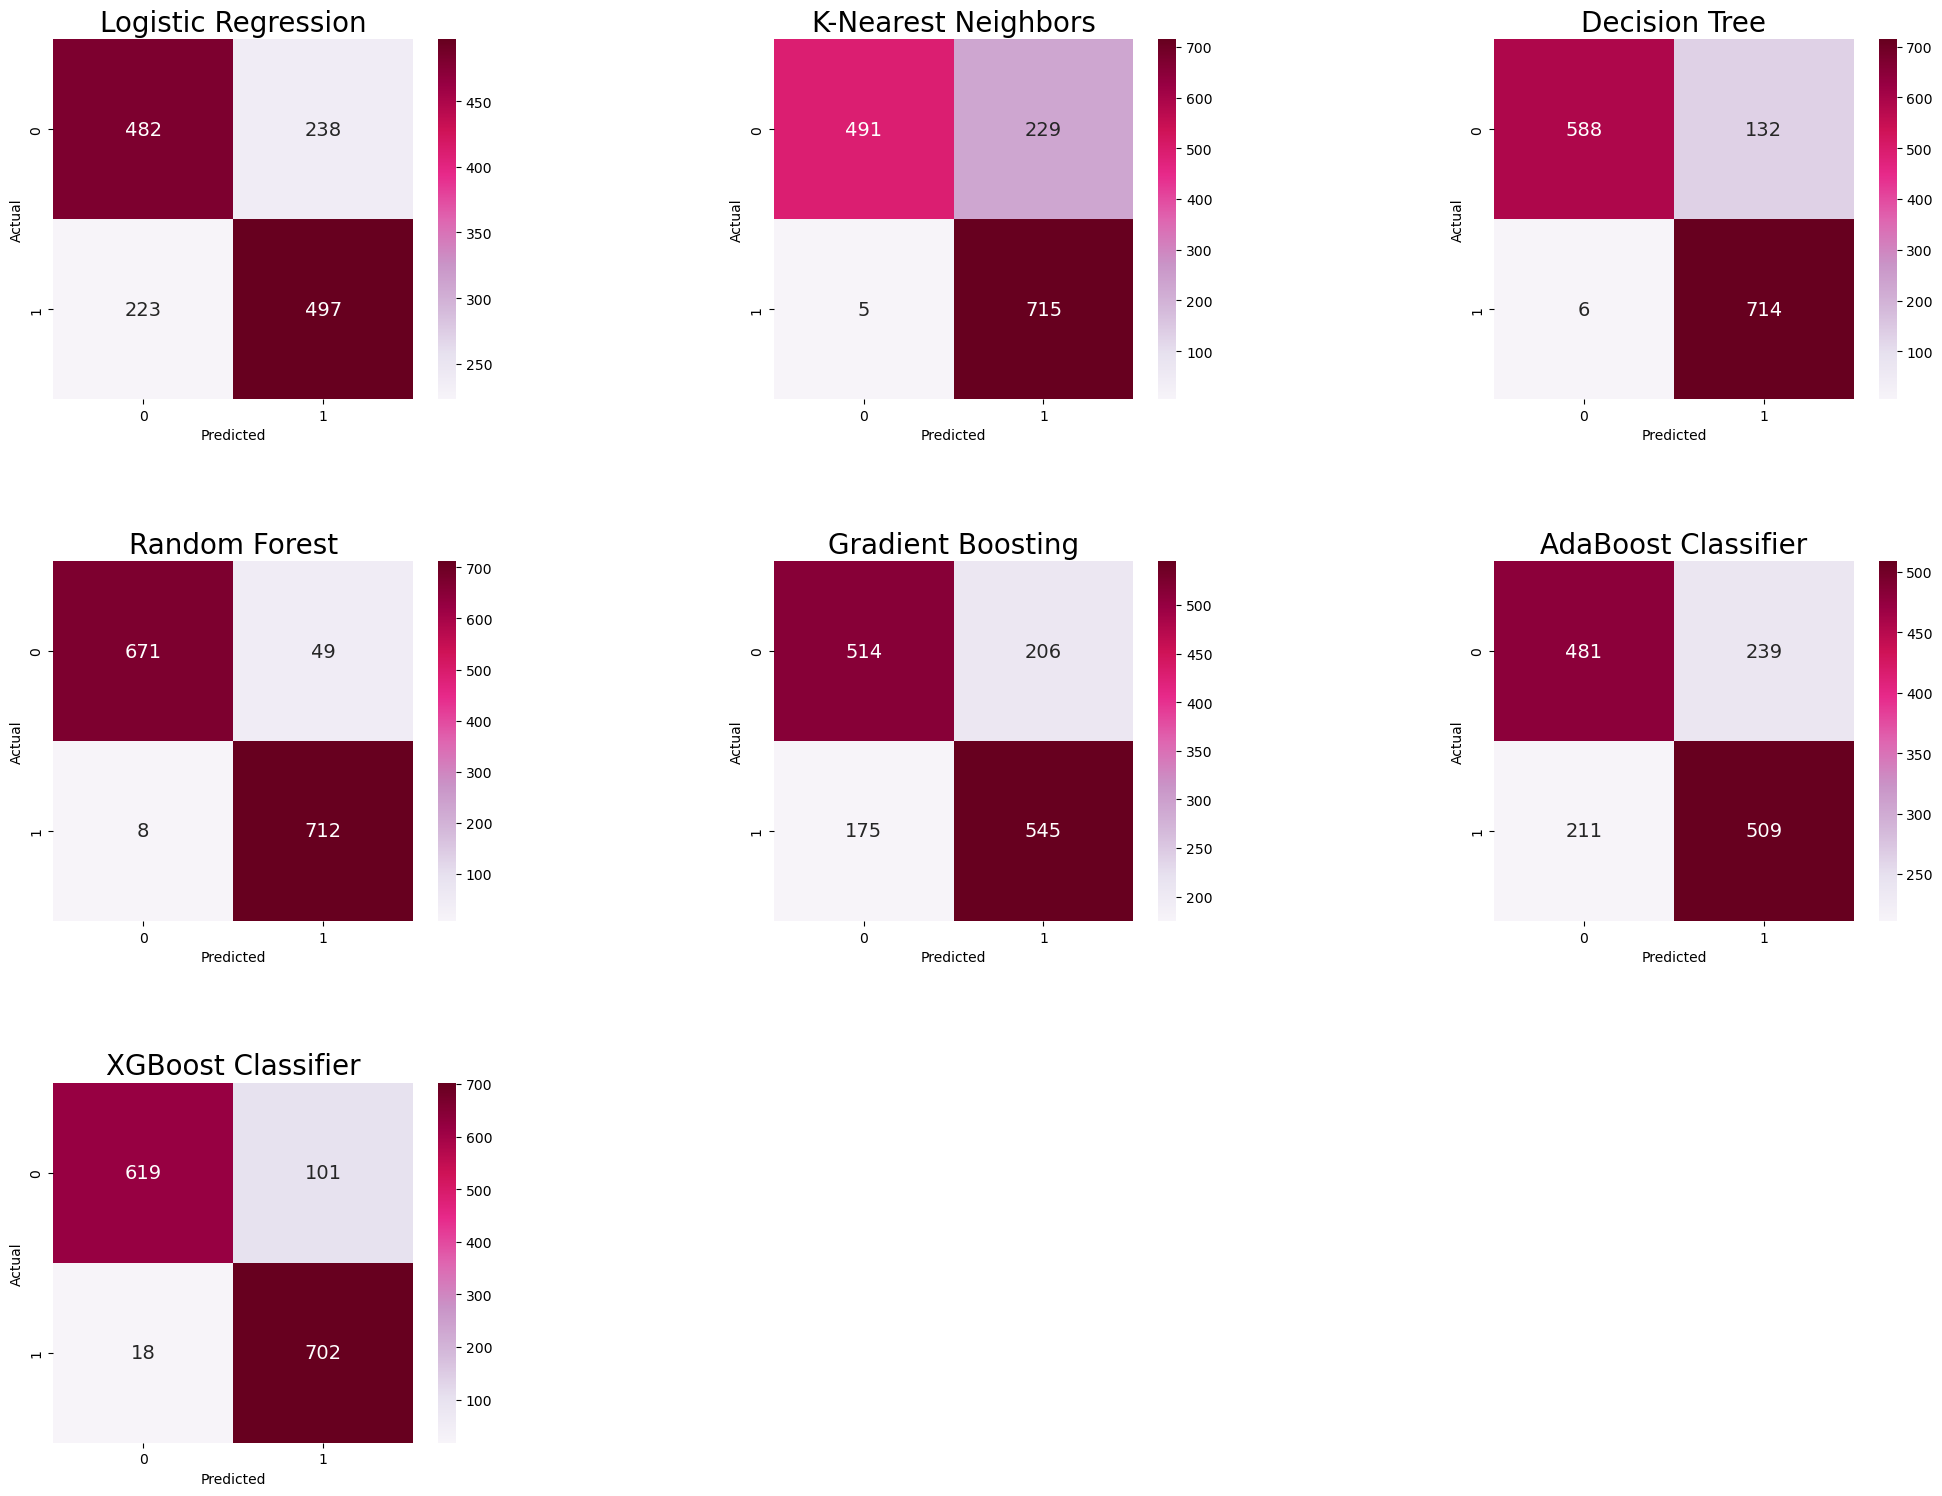

In [90]:
# Plotted a confussion matrix to see the predictions
fig = plt.figure(figsize=(25, 25))
start = 1
print("confusion_matrix For Test data:")
for name, model in var_models.items():
    y_test_pred = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index=np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, start)
    fig.subplots_adjust(wspace=0.45, hspace=0.45)
    sns.heatmap(heat_cm, annot=True, fmt='d', square=True, annot_kws={"size": 14}, cmap='PuRd').set_title(name, fontsize=20)
    start += 1

plt.show()


confusion_matrix For Train data:


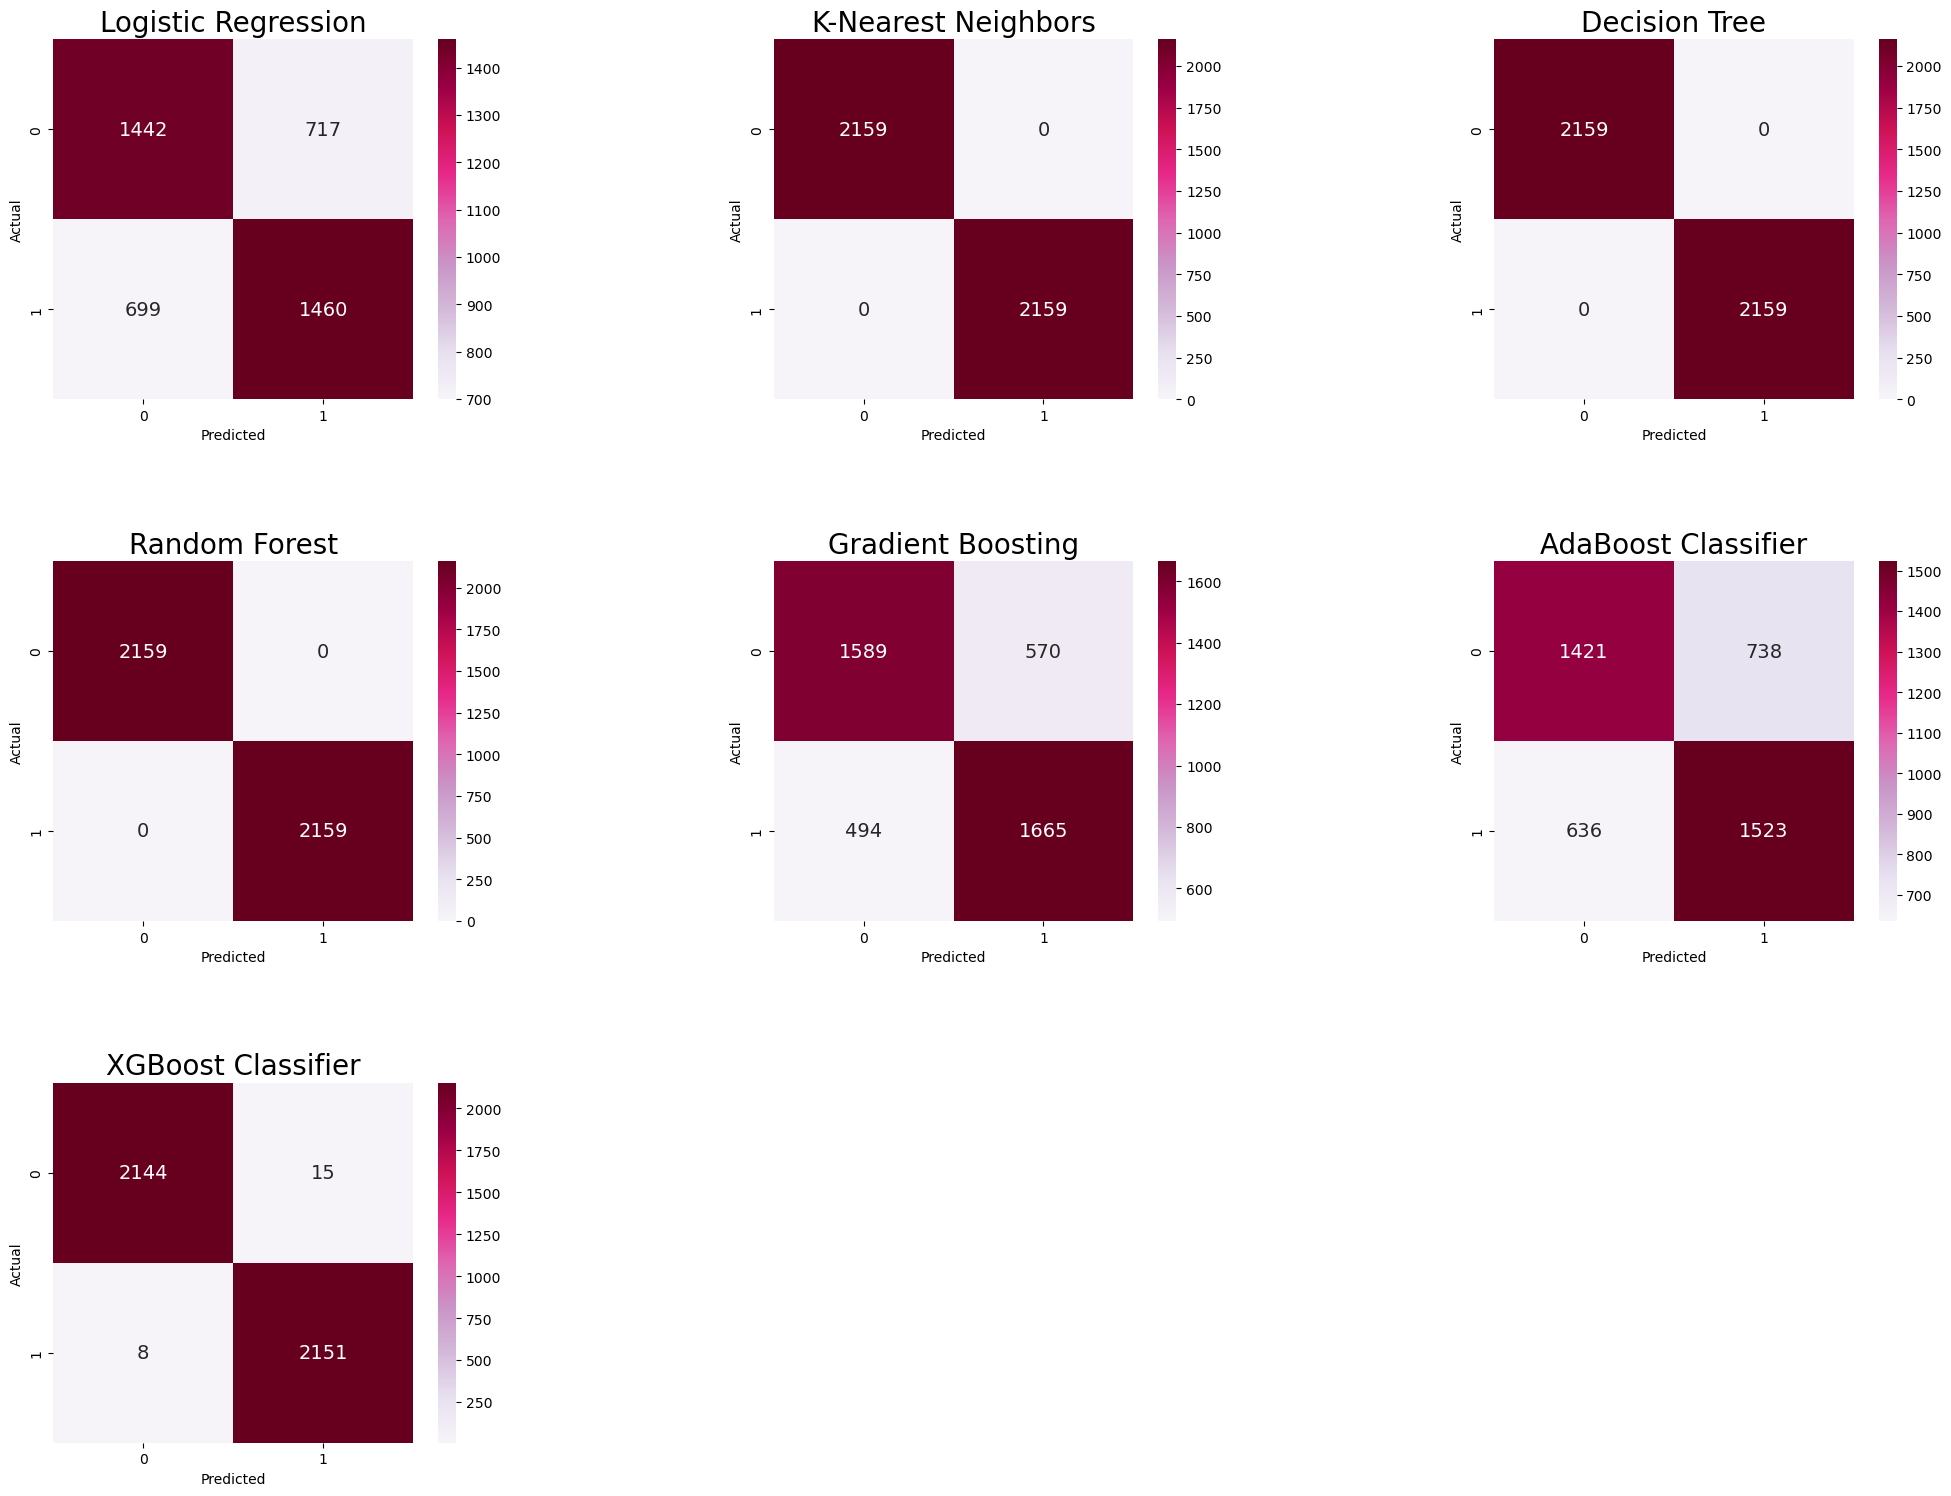

In [96]:
# Similarly for Train data
fig = plt.figure(figsize=(25, 25))
a = 1
print("confusion_matrix For Train data:")

for name, model in var_models.items():
    y_test_pred = model.predict(x_train)
    conf_mx = confusion_matrix(y_train, y_test_pred)
    
    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_train), index=np.unique(y_train))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace=0.45)
    sns.heatmap(heat_cm, annot=True, fmt='d', square=True, annot_kws={"size": 14}, cmap='PuRd').set_title(name, fontsize=20)
    a += 1

plt.show()


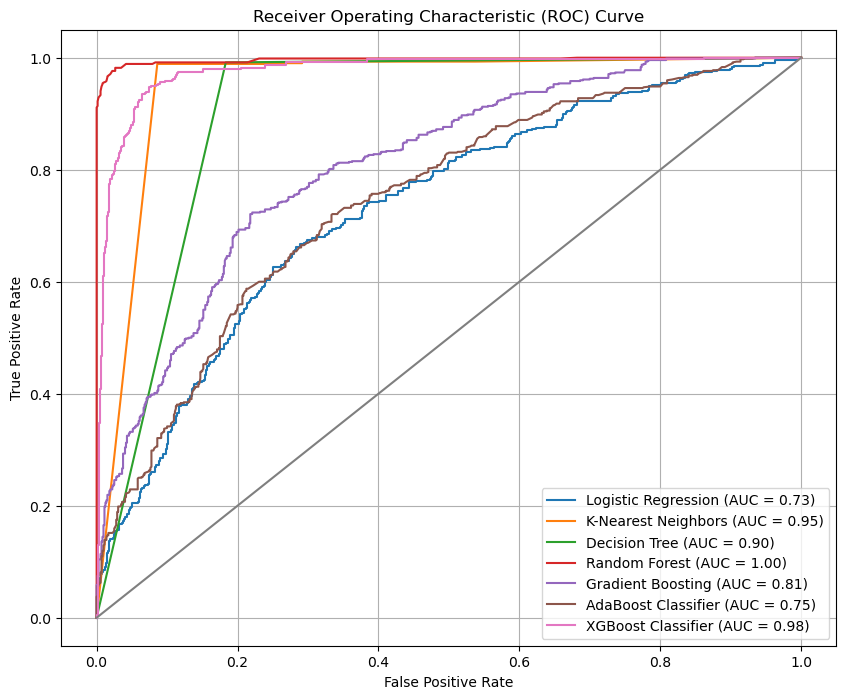

In [92]:
plt.figure(figsize=(10, 8))
# Plot ROC curve for each model
for name, model in var_models.items():
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [93]:
# Define the evaluation metrics for each model
evaluation_metrics = {
    "Logistic Regression": {
        "Precision": 0.68,
        "Recall": 0.68,
        "F1-score": 0.68,
        "Accuracy": 0.68,
        "ROC AUC Score": 0.7329
    },
    "K-Nearest Neighbors": {
        "Precision": 0.87,
        "Recall": 0.83,
        "F1-score": 0.83,
        "Accuracy": 0.84,
        "ROC AUC Score": 0.9509
    },
    "Decision Tree": {
        "Precision": 0.92,
        "Recall": 0.91,
        "F1-score": 0.90,
        "Accuracy": 0.91,
        "ROC AUC Score": 0.9076
    },
    "Random Forest": {
        "Precision": 0.96,
        "Recall": 0.96,
        "F1-score": 0.96,
        "Accuracy": 0.96,
        "ROC AUC Score": 0.9973
    },
    "Gradient Boosting": {
        "Precision": 0.74,
        "Recall": 0.73,
        "F1-score": 0.73,
        "Accuracy": 0.74,
        "ROC AUC Score": 0.8085
    },
    "AdaBoost Classifier": {
        "Precision": 0.69,
        "Recall": 0.69,
        "F1-score": 0.68,
        "Accuracy": 0.69,
        "ROC AUC Score": 0.7466
    },
    "XGBoost Classifier": {
        "Precision": 0.92,
        "Recall": 0.92,
        "F1-score": 0.92,
        "Accuracy": 0.92,
        "ROC AUC Score": 0.9774
    }
}
df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')
df

Precision  Recall  F1-score  Accuracy  ROC AUC Score
Logistic Regression       0.68    0.68      0.68      0.68         0.7329
K-Nearest Neighbors       0.87    0.83      0.83      0.84         0.9509
Decision Tree             0.92    0.91      0.90      0.91         0.9076
Random Forest             0.96    0.96      0.96      0.96         0.9973
Gradient Boosting         0.74    0.73      0.73      0.74         0.8085
AdaBoost Classifier       0.69    0.69      0.68      0.69         0.7466
XGBoost Classifier        0.92    0.92      0.92      0.92         0.9774

In [95]:
Cross_validation_acc = {
    "Random Forest": {
        "training_accuracy mean": 0.9502,
        "training_accuracy max": 0.9652
    },
    "Xgboost": {
        "training_accuracy mean": 0.9082,
        "training_accuracy max": 0.9421
    },
    "Decision Tree": {
        "training_accuracy mean": 0.8948,
        "training_accuracy max": 0.9164
    }
}
df1 = pd.DataFrame.from_dict(Cross_validation_acc, orient='index')
df1

training_accuracy mean  training_accuracy max
Random Forest                  0.9502                 0.9652
Xgboost                        0.9082                 0.9421
Decision Tree                  0.8948                 0.9164